In [422]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sm
# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
# Data display coustomization
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

# if you want to change the format, for example to avoid scientific notation, e.g. e+04
pd.set_option('display.float_format', lambda x: '%.1f' % x)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import linear_model

# Reading the data


In [68]:
d1 = pd.read_csv("/Users/cej12/Skrivebord/data/out3.csv")
d1

,Unnamed: 0,Country,health,income,inflation,Region,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,Schooling,Status,Birth Rate,GDP,Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Physicians per thousand,Population,Unemployment rate,Urban_population,fuel,GDP per capita
0,0,Afghanistan,7.6,1610,9.4,Asia,0.0,65,42,23.3,67,65,0.0,3.6,0,32.5,19101353833.0,9.7,47.9,64.5,638.0,0.3,38041754.0,11.1,9797273.0,35.4,502.1
1,1,Albania,6.5,9930,4.5,Rest of Europe,4.3,99,98,26.6,99,99,0.0,9.7,0,11.8,15278077447.0,55.0,7.8,78.5,15.0,1.2,2854191.0,12.3,1747593.0,83.7,5352.9
2,2,Algeria,4.2,12900,16.1,Africa,0.6,95,99,25.5,95,95,0.1,7.9,0,24.3,169988236398.0,51.4,20.1,76.7,112.0,1.7,43053054.0,11.7,31510100.0,99.7,3948.3
3,3,Angola,2.9,5900,22.4,Africa,6.5,64,64,23.2,62,64,0.9,5.0,0,40.7,94635415870.0,9.3,51.6,60.8,241.0,0.2,31825295.0,6.9,21061025.0,50.0,2973.6
4,4,Antigua and Barbuda,6.0,19100,1.4,Central America and Caribbean,9.1,99,84,26.6,86,99,0.2,9.2,0,15.3,1727759259.0,24.8,5.0,76.9,42.0,2.8,97118.0,6.9,23800.0,100.0,17790.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,141,Uzbekistan,5.8,4240,16.5,Asia,2.6,99,99,26.7,99,99,0.1,11.4,0,23.3,57921286440.0,10.1,19.1,71.6,29.0,2.4,33580650.0,5.9,16935729.0,82.8,1724.8
142,142,Vanuatu,5.2,2950,2.6,Oceania,1.4,64,65,26.1,80,64,0.2,6.8,0,29.6,917058851.0,4.7,22.3,70.3,72.0,0.2,299882.0,4.4,76152.0,6.9,3058.1
143,143,Venezuela,4.9,16500,45.9,South America,6.2,87,83,26.7,87,87,0.4,10.1,0,17.9,482359318768.0,79.3,21.4,72.1,125.0,1.9,28515829.0,8.8,25162368.0,95.5,16915.5
144,144,Vietnam,6.8,4490,12.1,Asia,3.0,97,65,21.7,97,97,0.1,8.0,0,16.8,261921244843.0,28.5,16.5,75.3,43.0,0.8,96462106.0,2.0,35332140.0,96.1,2715.3


In [69]:
vis = d1.copy()
vis

,Unnamed: 0,Country,health,income,inflation,Region,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,Schooling,Status,Birth Rate,GDP,Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Physicians per thousand,Population,Unemployment rate,Urban_population,fuel,GDP per capita
0,0,Afghanistan,7.6,1610,9.4,Asia,0.0,65,42,23.3,67,65,0.0,3.6,0,32.5,19101353833.0,9.7,47.9,64.5,638.0,0.3,38041754.0,11.1,9797273.0,35.4,502.1
1,1,Albania,6.5,9930,4.5,Rest of Europe,4.3,99,98,26.6,99,99,0.0,9.7,0,11.8,15278077447.0,55.0,7.8,78.5,15.0,1.2,2854191.0,12.3,1747593.0,83.7,5352.9
2,2,Algeria,4.2,12900,16.1,Africa,0.6,95,99,25.5,95,95,0.1,7.9,0,24.3,169988236398.0,51.4,20.1,76.7,112.0,1.7,43053054.0,11.7,31510100.0,99.7,3948.3
3,3,Angola,2.9,5900,22.4,Africa,6.5,64,64,23.2,62,64,0.9,5.0,0,40.7,94635415870.0,9.3,51.6,60.8,241.0,0.2,31825295.0,6.9,21061025.0,50.0,2973.6
4,4,Antigua and Barbuda,6.0,19100,1.4,Central America and Caribbean,9.1,99,84,26.6,86,99,0.2,9.2,0,15.3,1727759259.0,24.8,5.0,76.9,42.0,2.8,97118.0,6.9,23800.0,100.0,17790.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,141,Uzbekistan,5.8,4240,16.5,Asia,2.6,99,99,26.7,99,99,0.1,11.4,0,23.3,57921286440.0,10.1,19.1,71.6,29.0,2.4,33580650.0,5.9,16935729.0,82.8,1724.8
142,142,Vanuatu,5.2,2950,2.6,Oceania,1.4,64,65,26.1,80,64,0.2,6.8,0,29.6,917058851.0,4.7,22.3,70.3,72.0,0.2,299882.0,4.4,76152.0,6.9,3058.1
143,143,Venezuela,4.9,16500,45.9,South America,6.2,87,83,26.7,87,87,0.4,10.1,0,17.9,482359318768.0,79.3,21.4,72.1,125.0,1.9,28515829.0,8.8,25162368.0,95.5,16915.5
144,144,Vietnam,6.8,4490,12.1,Asia,3.0,97,65,21.7,97,97,0.1,8.0,0,16.8,261921244843.0,28.5,16.5,75.3,43.0,0.8,96462106.0,2.0,35332140.0,96.1,2715.3


In [70]:
vis.drop(['Unnamed: 0', 'Country', 'Region'], axis=1, inplace=True)

In [71]:
vis

,health,income,inflation,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,Schooling,Status,Birth Rate,GDP,Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Physicians per thousand,Population,Unemployment rate,Urban_population,fuel,GDP per capita
0,7.6,1610,9.4,0.0,65,42,23.3,67,65,0.0,3.6,0,32.5,19101353833.0,9.7,47.9,64.5,638.0,0.3,38041754.0,11.1,9797273.0,35.4,502.1
1,6.5,9930,4.5,4.3,99,98,26.6,99,99,0.0,9.7,0,11.8,15278077447.0,55.0,7.8,78.5,15.0,1.2,2854191.0,12.3,1747593.0,83.7,5352.9
2,4.2,12900,16.1,0.6,95,99,25.5,95,95,0.1,7.9,0,24.3,169988236398.0,51.4,20.1,76.7,112.0,1.7,43053054.0,11.7,31510100.0,99.7,3948.3
3,2.9,5900,22.4,6.5,64,64,23.2,62,64,0.9,5.0,0,40.7,94635415870.0,9.3,51.6,60.8,241.0,0.2,31825295.0,6.9,21061025.0,50.0,2973.6
4,6.0,19100,1.4,9.1,99,84,26.6,86,99,0.2,9.2,0,15.3,1727759259.0,24.8,5.0,76.9,42.0,2.8,97118.0,6.9,23800.0,100.0,17790.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,5.8,4240,16.5,2.6,99,99,26.7,99,99,0.1,11.4,0,23.3,57921286440.0,10.1,19.1,71.6,29.0,2.4,33580650.0,5.9,16935729.0,82.8,1724.8
142,5.2,2950,2.6,1.4,64,65,26.1,80,64,0.2,6.8,0,29.6,917058851.0,4.7,22.3,70.3,72.0,0.2,299882.0,4.4,76152.0,6.9,3058.1
143,4.9,16500,45.9,6.2,87,83,26.7,87,87,0.4,10.1,0,17.9,482359318768.0,79.3,21.4,72.1,125.0,1.9,28515829.0,8.8,25162368.0,95.5,16915.5
144,6.8,4490,12.1,3.0,97,65,21.7,97,97,0.1,8.0,0,16.8,261921244843.0,28.5,16.5,75.3,43.0,0.8,96462106.0,2.0,35332140.0,96.1,2715.3


In [72]:
cont_vars = list(vis.columns)
def dist_plot(data):
    plt.figure(figsize=(15, 40))
    i = 0
    for col in cont_vars:
        i += 1
        plt.subplot(9, 4, i)
        plt.hist(data[col])
        plt.title('{} '.format(col))
    plt.show()

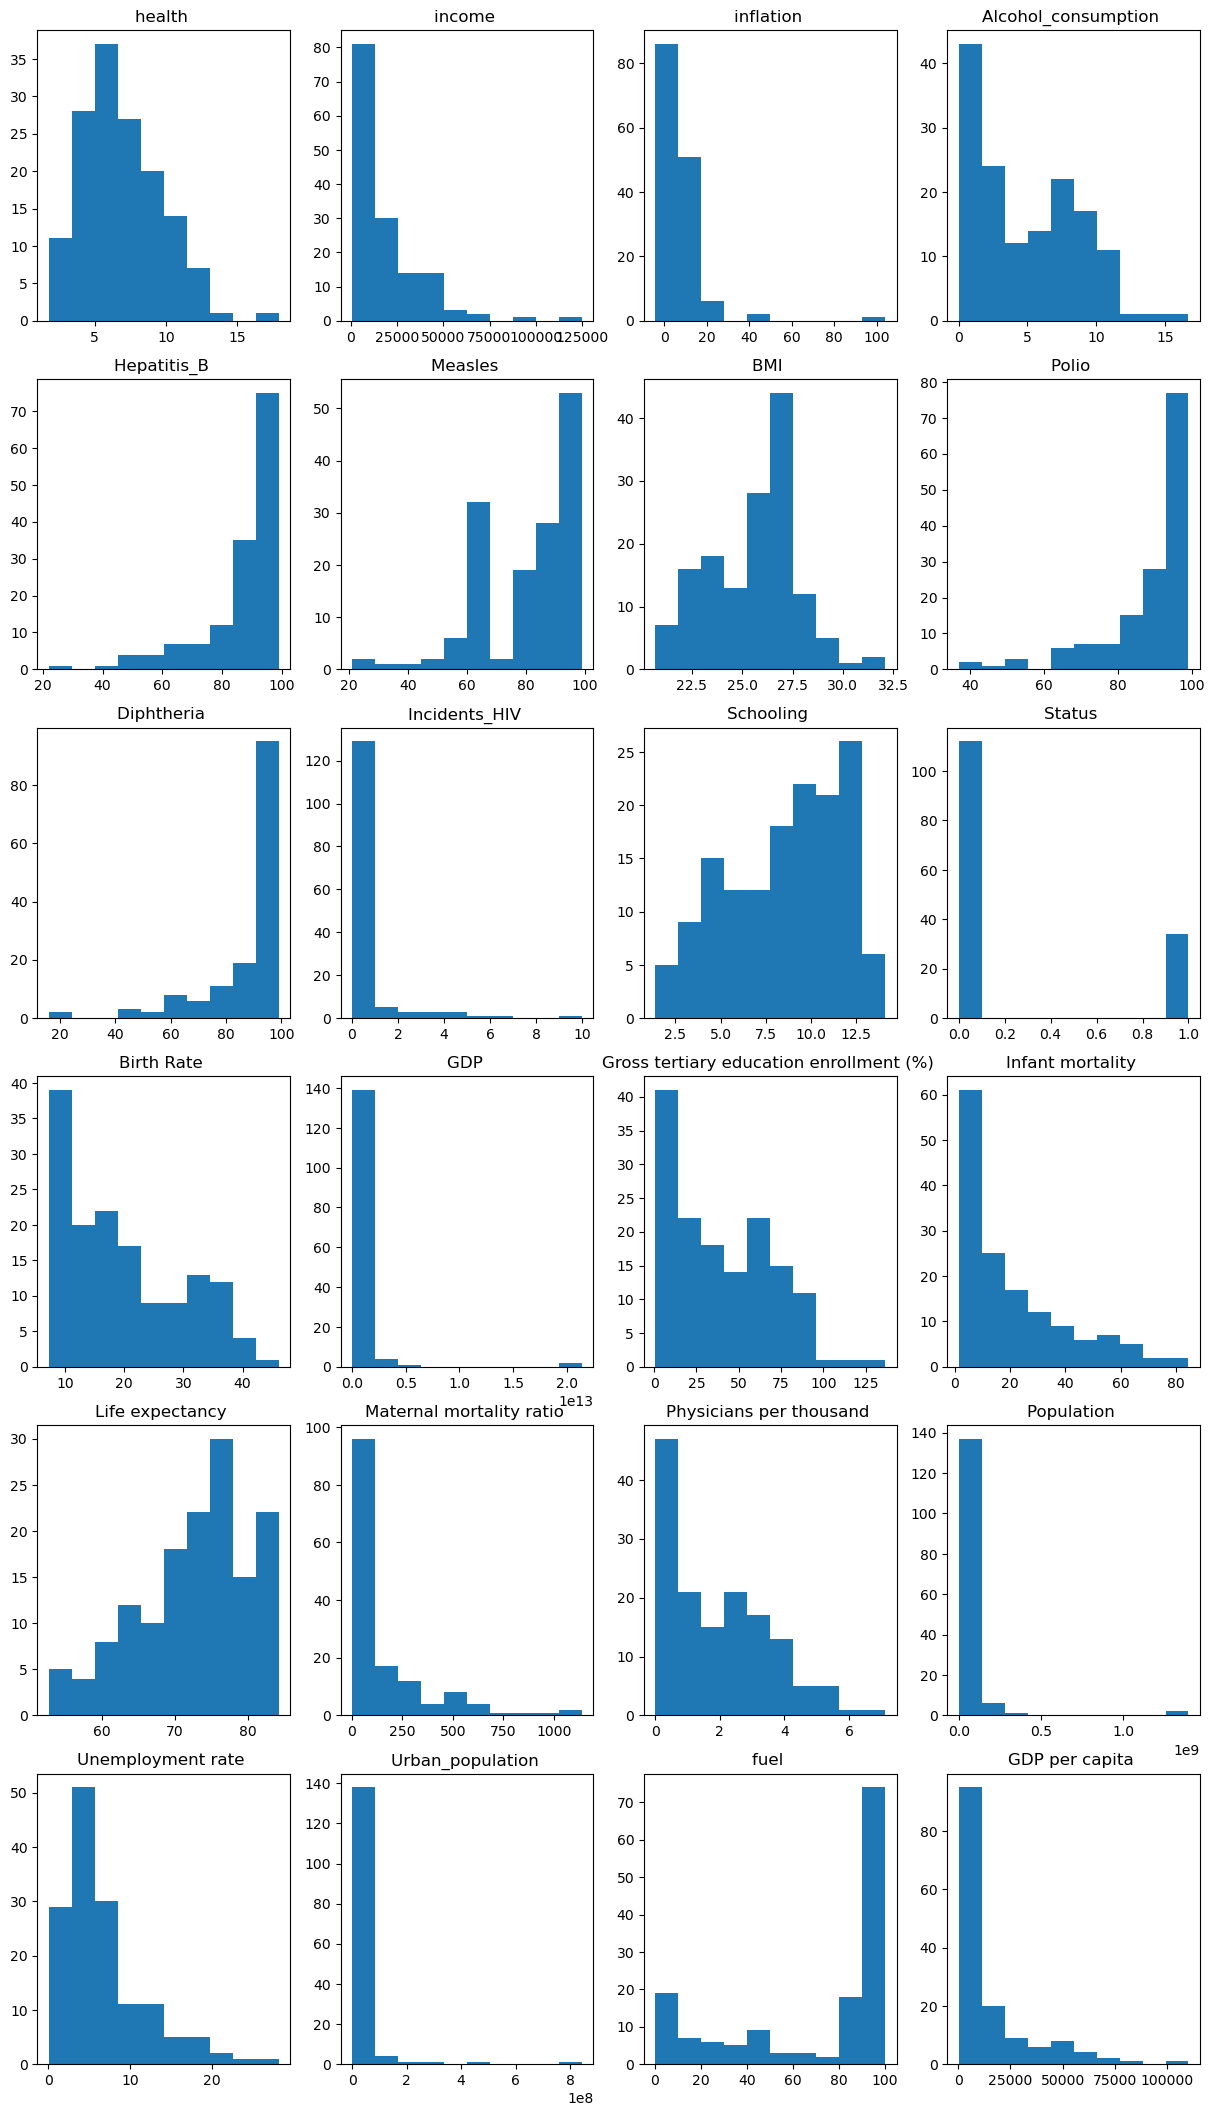

In [73]:
dist_plot(vis)

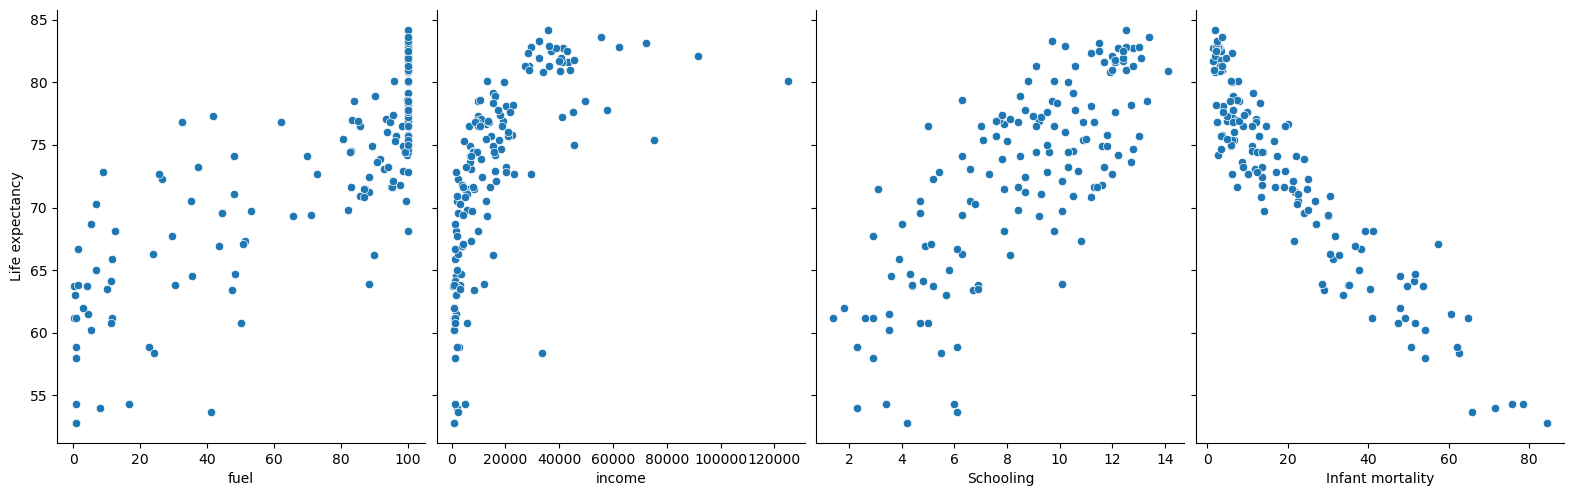

In [74]:
# visualise the features and the response using scatterplots
sns.pairplot(d1, x_vars=['fuel', 'income','Schooling', 'Infant mortality'], y_vars='Life expectancy', height=5, aspect=0.8)

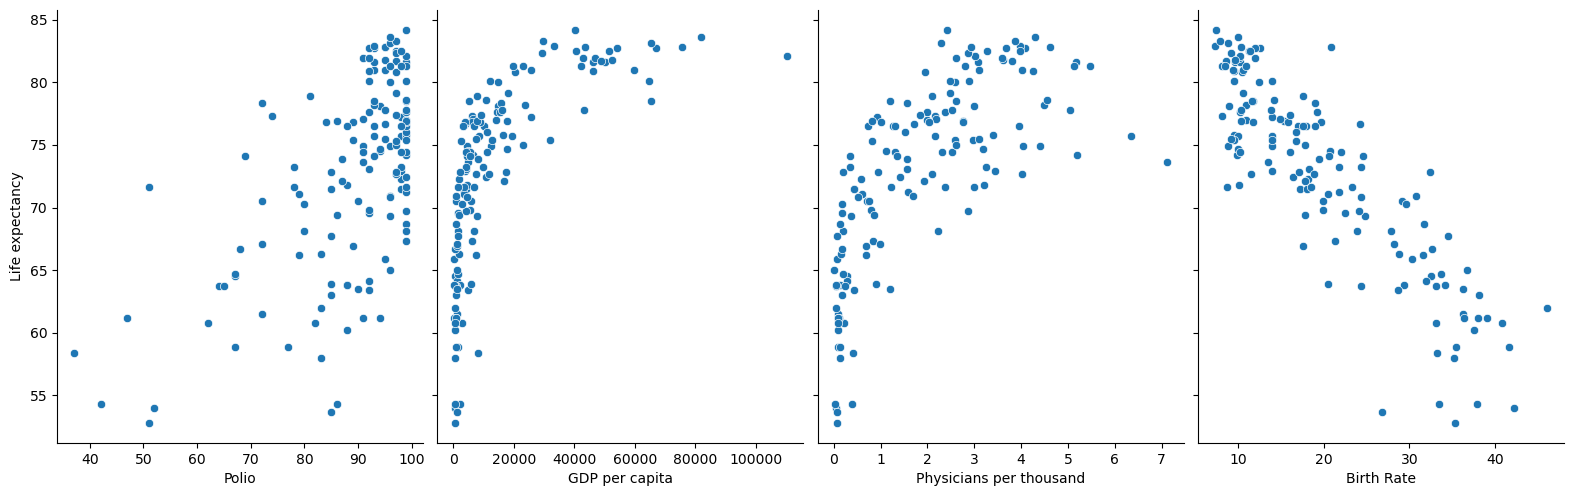

In [75]:
# visualise the features and the response using scatterplots
sns.pairplot(d1, x_vars=['Polio', 'GDP per capita', 'Physicians per thousand', 'Birth Rate'], y_vars='Life expectancy', height=5, aspect=0.8)

In [76]:
d1.corr(numeric_only=True)['Life expectancy'].sort_values()

Infant mortality                          -0.9
Birth Rate                                -0.9
Maternal mortality ratio                  -0.8
Incidents_HIV                             -0.5
inflation                                 -0.3
Unemployment rate                         -0.0
Population                                 0.0
Unnamed: 0                                 0.0
Urban_population                           0.1
GDP                                        0.2
health                                     0.3
Hepatitis_B                                0.4
Alcohol_consumption                        0.4
BMI                                        0.5
Diphtheria                                 0.6
Measles                                    0.6
Status                                     0.6
Polio                                      0.6
income                                     0.6
GDP per capita                             0.7
Physicians per thousand                    0.7
Gross tertiar

<Axes: >

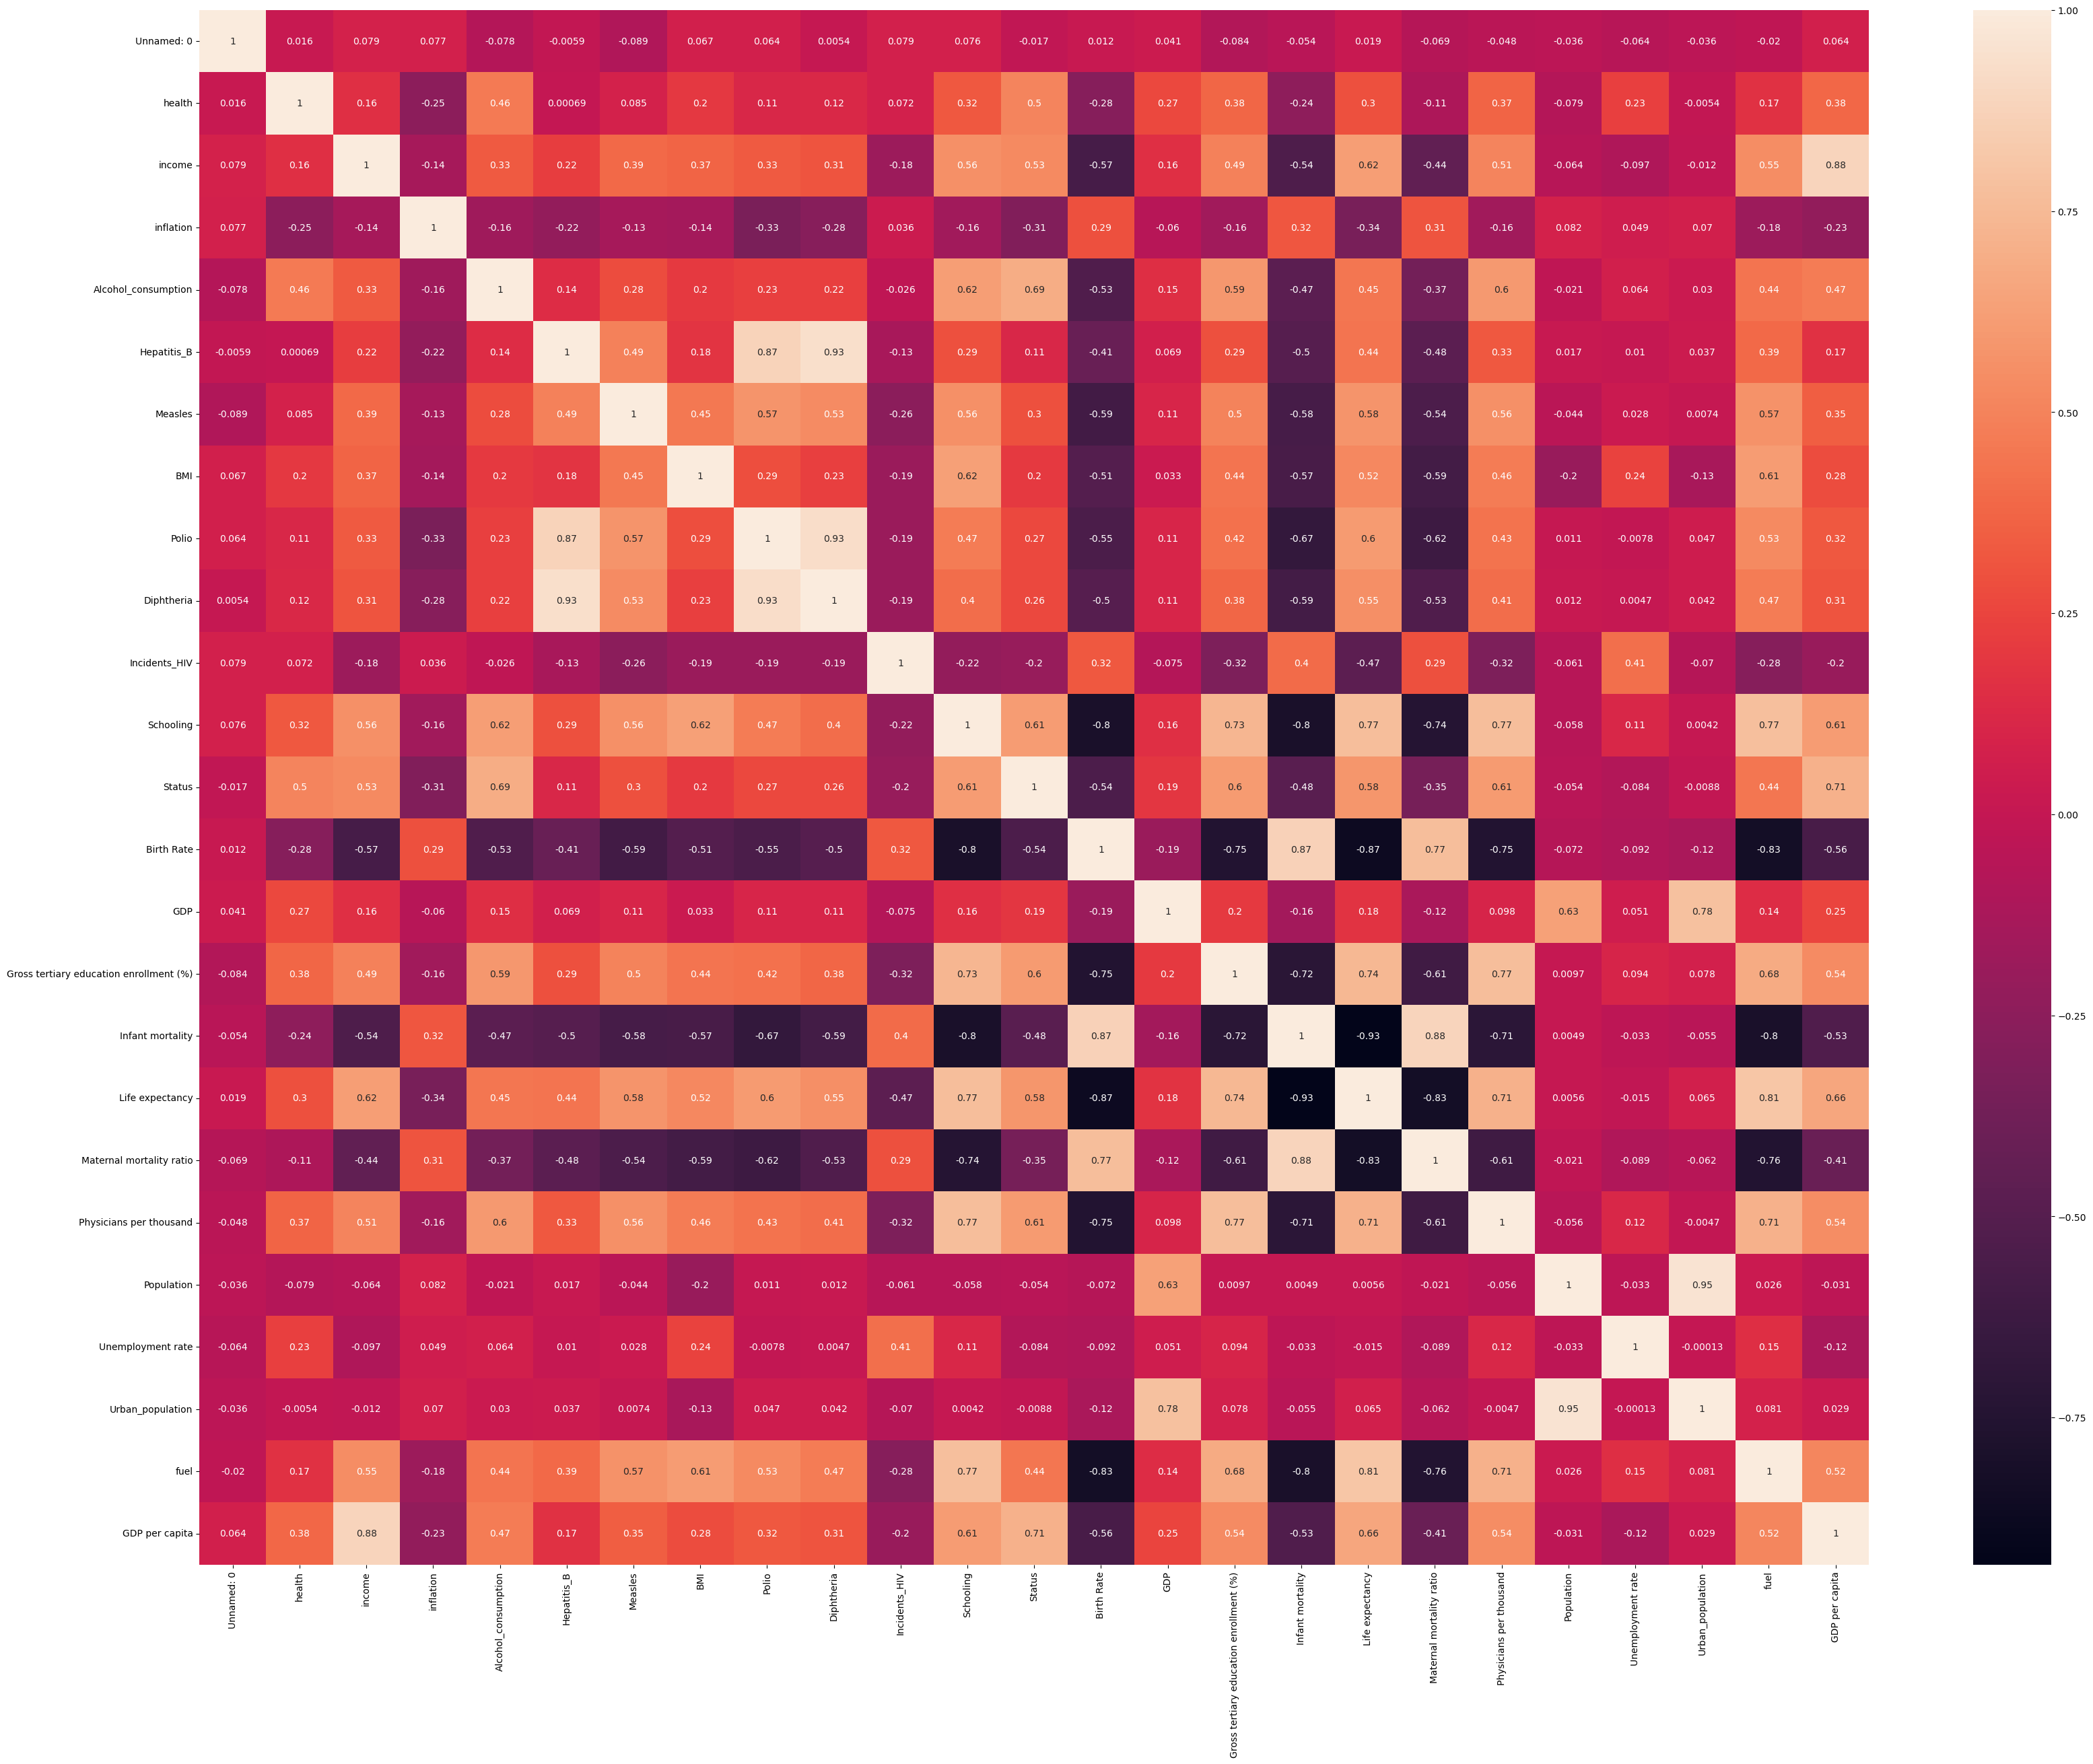

In [77]:
#data = data.drop('date',axis=1) (need to remove 'date' before calling data.corr() since date contains non-intable data) 
corr_matrix = d1.corr(numeric_only=True)
plt.figure(figsize=(40,30))
sns.heatmap(corr_matrix, annot=True)

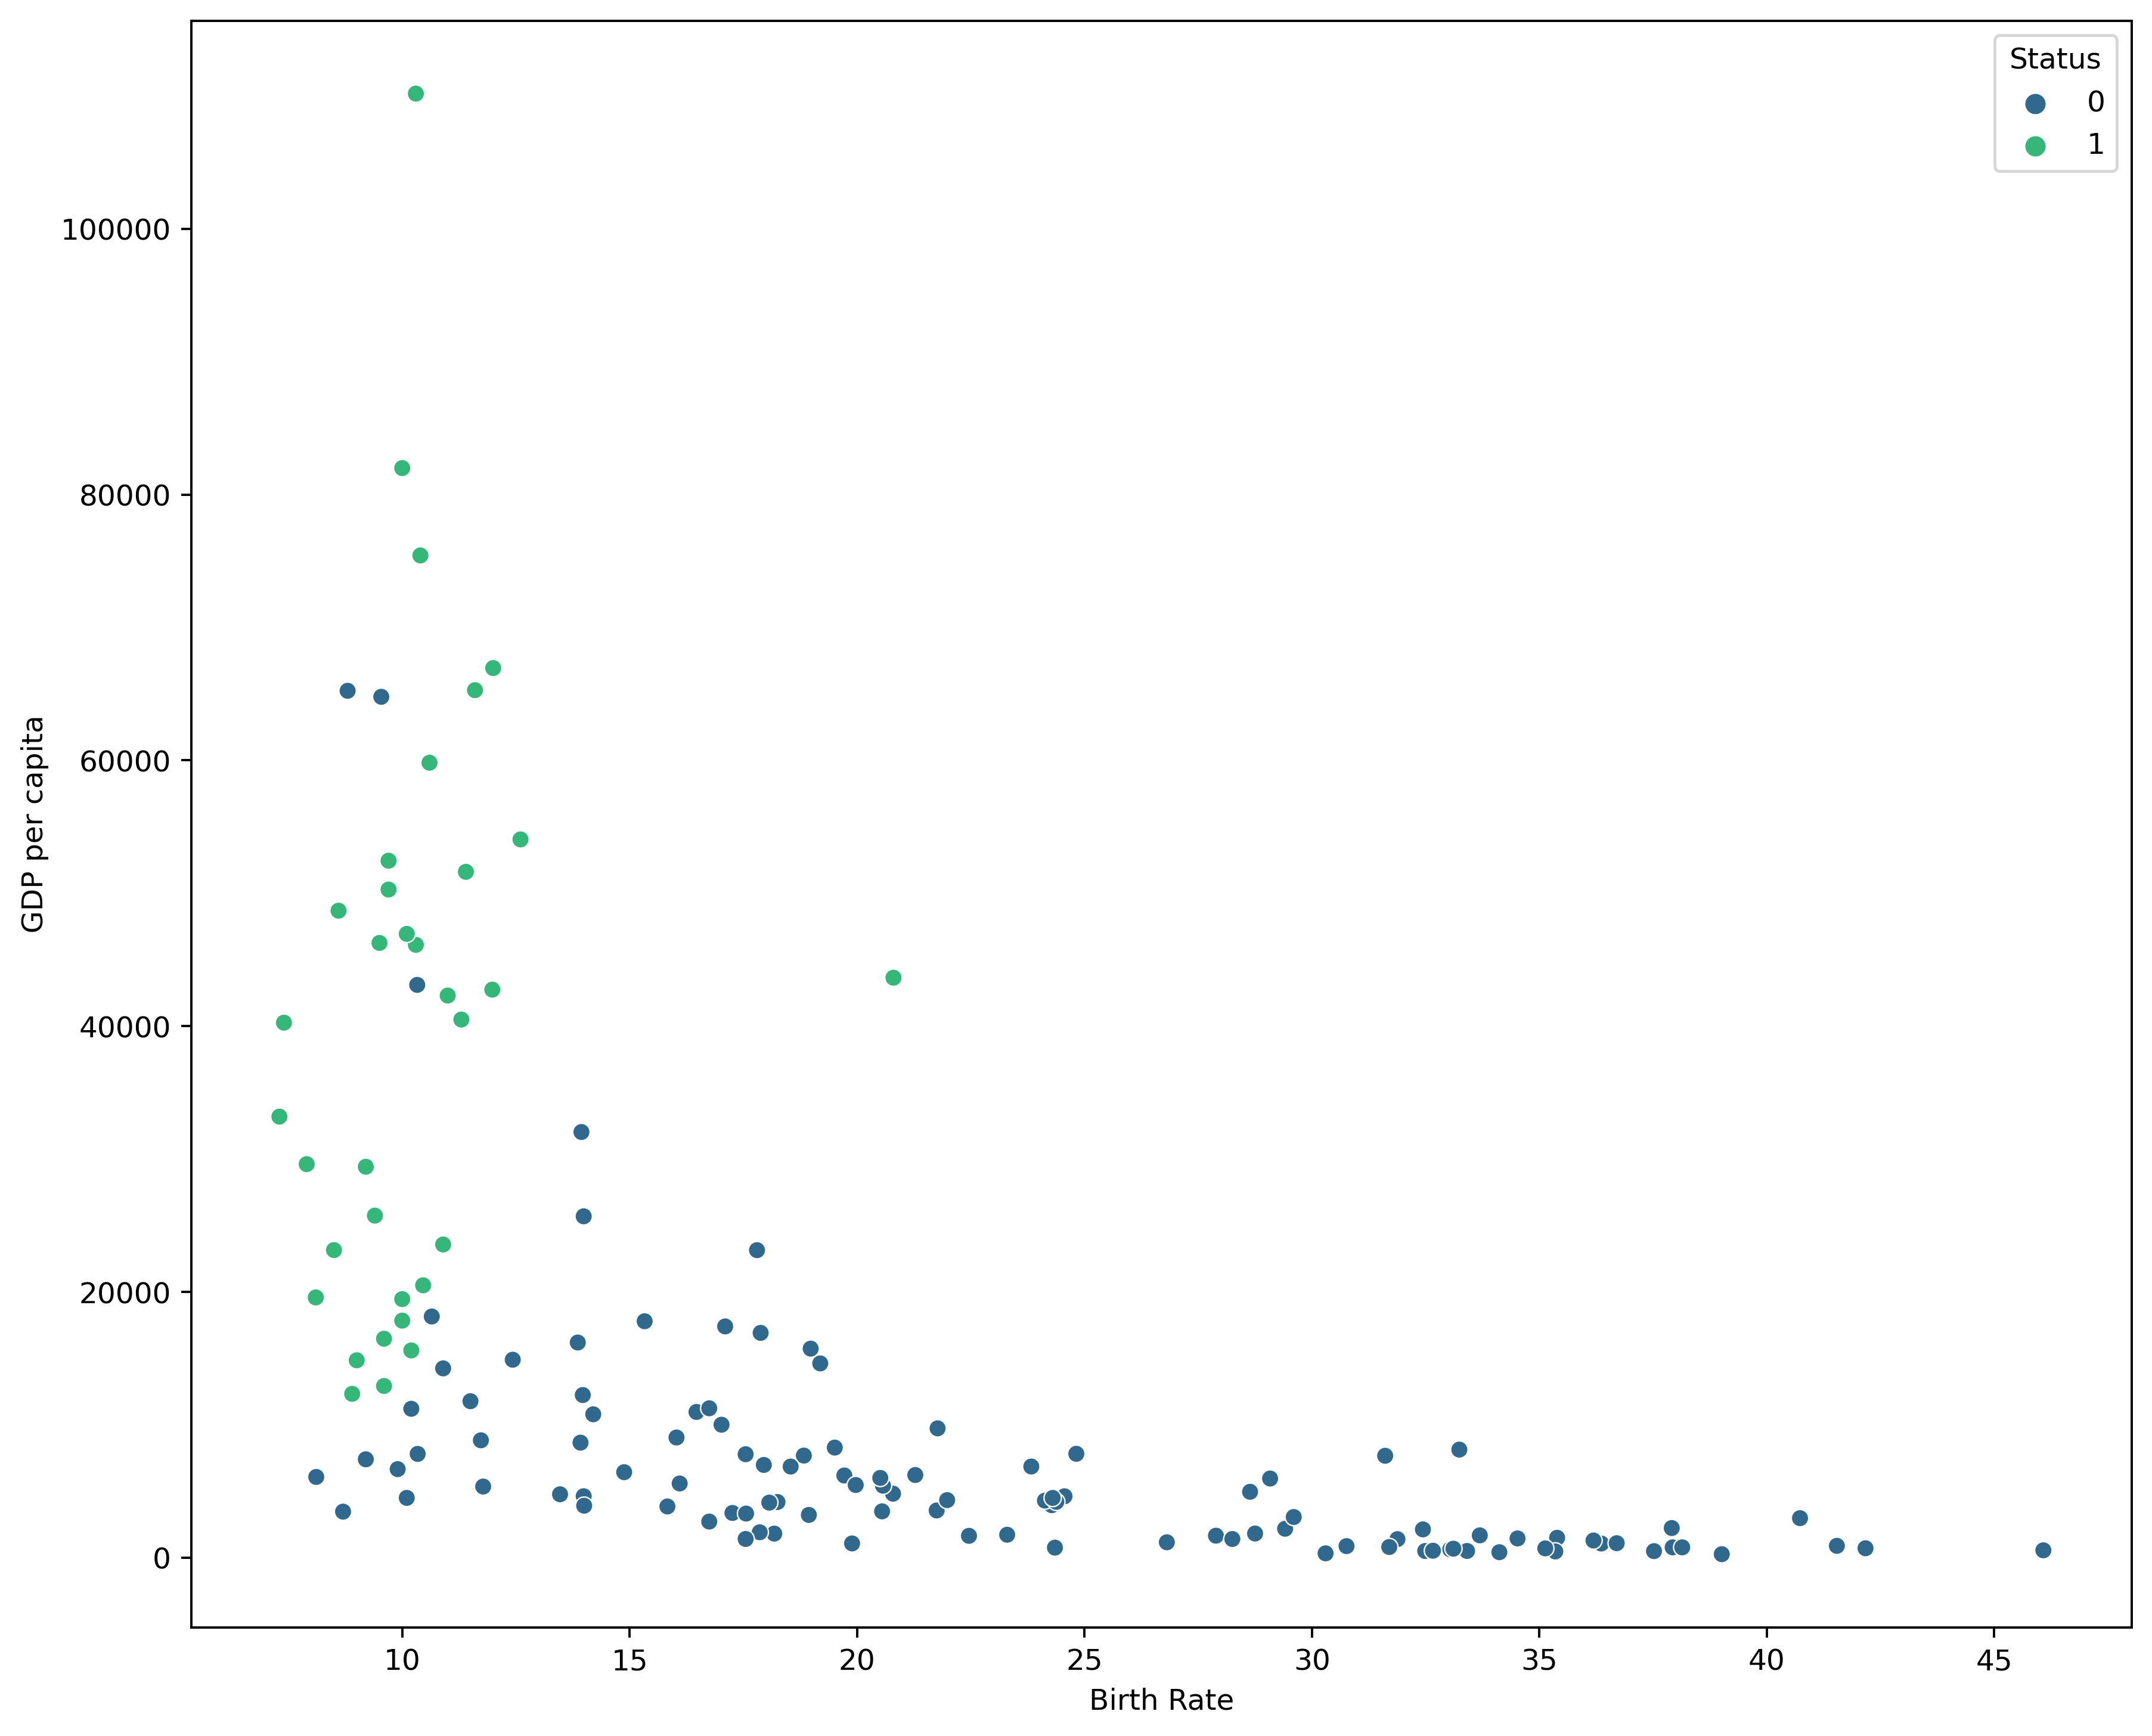

In [78]:
plt.figure(figsize=(12, 10), dpi=350)
sns.scatterplot(x=d1['Birth Rate'], y=d1['GDP per capita'], hue=d1['Status'], palette='viridis');


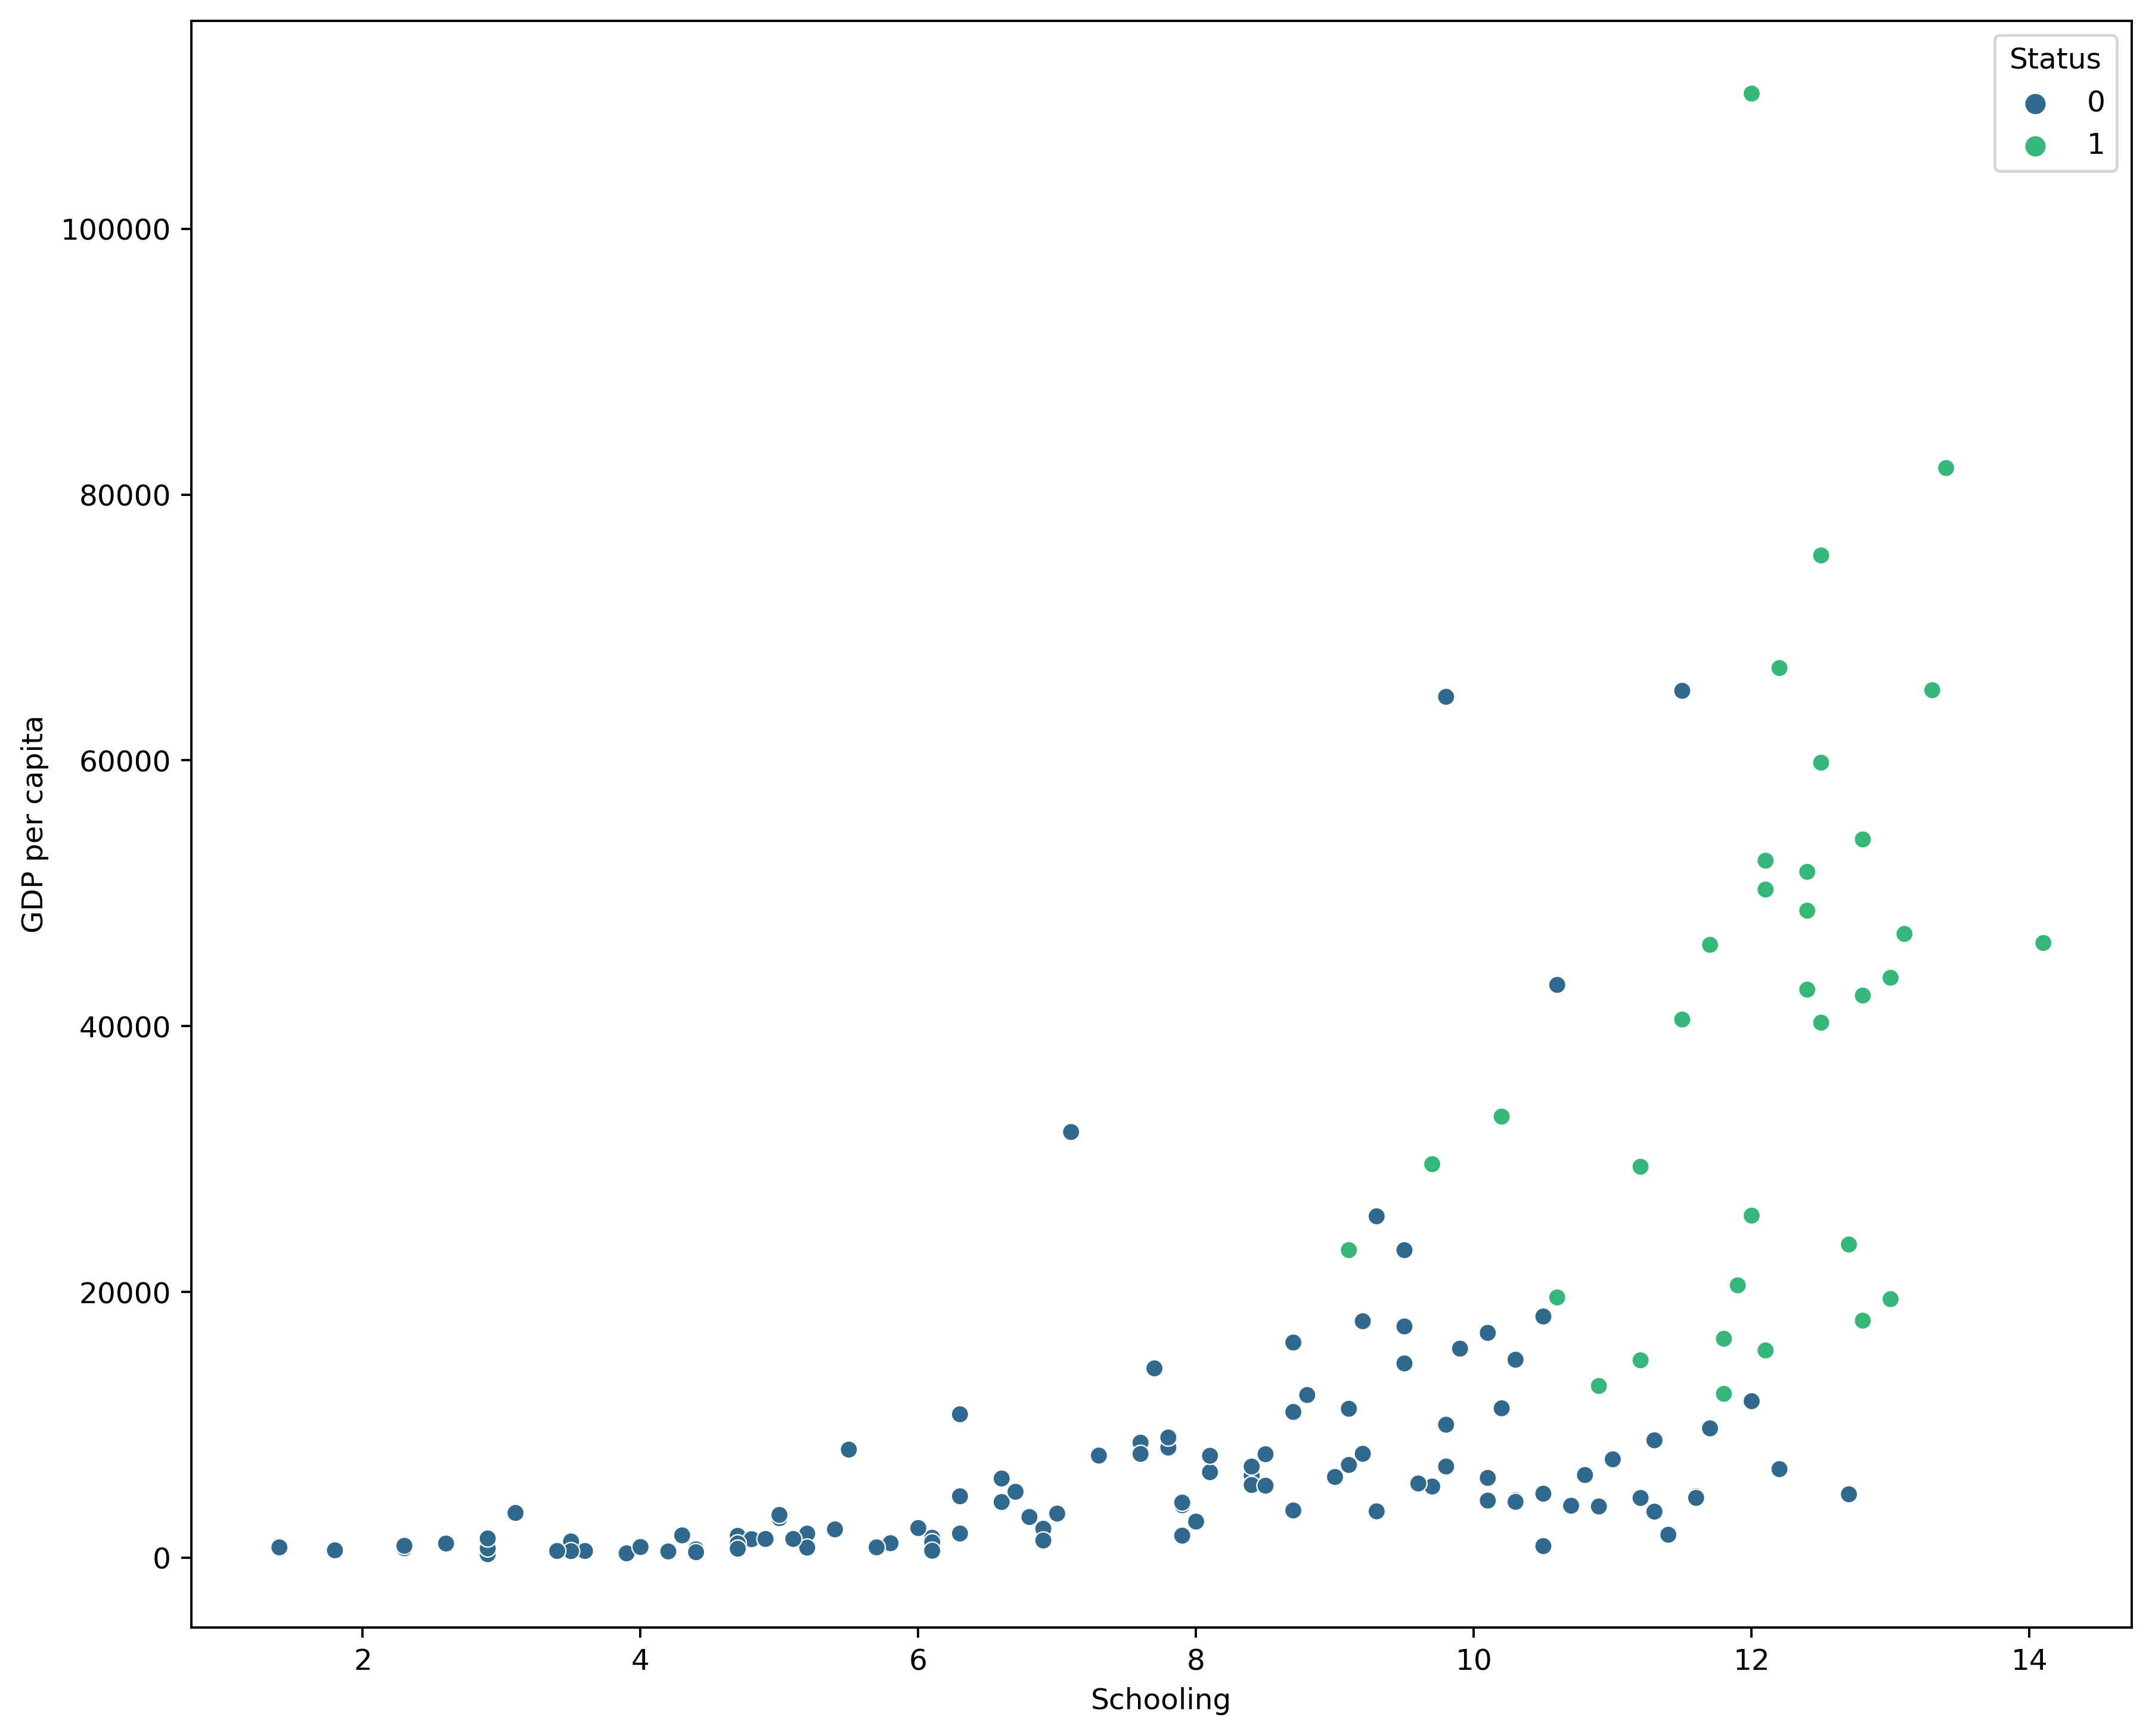

In [79]:
plt.figure(figsize=(12, 10), dpi=350)
sns.scatterplot(x=d1['Schooling'], y=d1['GDP per capita'], hue=d1['Status'], palette='viridis');

# multi with 'fuel', 'Schooling', 'Incidents_HIV', 'Birth Rate', 'GDP per capita'

In [766]:
y = d1['Life expectancy']
y

0     64.5
1     78.5
2     76.7
3     60.8
4     76.9
      ... 
141   71.6
142   70.3
143   72.1
144   75.3
145   63.5
Name: Life expectancy, Length: 146, dtype: float64

In [767]:
# create a Python list of feature names
feature_cols = ['fuel', 'Schooling', 'Incidents_HIV', 'Birth Rate', 'GDP per capita']

# use the list to select a subset of the original DataFrame
X = d1[feature_cols]

# print the first 5 rows
X

,fuel,Schooling,Incidents_HIV,Birth Rate,GDP per capita
0,35.4,3.6,0.0,32.5,502.1
1,83.7,9.7,0.0,11.8,5352.9
2,99.7,7.9,0.1,24.3,3948.3
3,50.0,5.0,0.9,40.7,2973.6
4,100.0,9.2,0.2,15.3,17790.3
...,...,...,...,...,...
141,82.8,11.4,0.1,23.3,1724.8
142,6.9,6.8,0.2,29.6,3058.1
143,95.5,10.1,0.4,17.9,16915.5
144,96.1,8.0,0.1,16.8,2715.3


In [768]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8, shuffle=True)
print ("train size={}, test_size={}, total_size={}".format(X_train.shape[0], X_test.shape[0], d1.shape[0]))

train size=116, test_size=30, total_size=146


In [769]:
# create a model
linreg = LinearRegression()

In [770]:
# fit the model to our training data
linreg.fit(X_train, y_train)

LinearRegression()

In [771]:
# the intercept and coefficients are stored in system variables
print('b0 =', linreg.intercept_)
print('bi =', linreg.coef_)

b0 = 73.3888113657124
bi = [ 5.29580475e-02  1.21540705e-01 -1.11344993e+00 -3.16950270e-01
  9.32816966e-05]


In [772]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('fuel', 0.052958047477416025),
 ('Schooling', 0.12154070530234293),
 ('Incidents_HIV', -1.1134499254985757),
 ('Birth Rate', -0.31695027004836496),
 ('GDP per capita', 9.328169655564067e-05)]

In [773]:
# make predictions on the testing set
y_predicted = linreg.predict(X_test)
y_predicted

array([81.9183716 , 59.14631746, 81.34295505, 74.59536219, 64.78731521,
       64.24376495, 60.32476463, 60.34853512, 81.42459472, 72.39306823,
       77.96640624, 76.74647046, 71.77937356, 87.04423768, 80.57485391,
       78.66064064, 72.37054217, 82.58036316, 77.17480452, 60.9656141 ,
       80.3485835 , 80.02185681, 69.81961503, 73.22381462, 76.49344913,
       62.99343344, 80.63976635, 67.72616329, 64.38074054, 75.76697543])

In [774]:
y_test

45    81.7
97    62.0
27    81.9
19    77.3
42    65.9
120   72.8
29    54.0
80    63.8
66    84.2
18    71.2
12    79.1
115   75.5
141   71.6
78    82.1
137   77.8
36    80.8
60    69.4
139   78.5
30    80.0
55    58.0
96    81.9
122   83.3
11    72.3
67    74.4
31    77.0
93    63.4
64    82.9
101   67.1
114   67.7
9     72.9
Name: Life expectancy, dtype: float64

# Model Evaluation Metrics

The three common evaluation metrics for regression problems are:
1. MAE is the easiest to understand, because it's the average error.  (Mean Absolute Error)
2. MSE is more popular than MAE, because MSE "punishes" larger errors.  (Mean Squared Error)
3. RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.  (Root Mean Squared Error)

- The RMSE. (Error is something we want to minimize, so a lower number for RMSE is better.)

In [775]:
# calculate MAE using scikit-learn
print("MAE: ", metrics.mean_absolute_error(y_test, y_predicted))
# calculate MSE using scikit-learn
print("MSE: ", metrics.mean_squared_error(y_test, y_predicted))
# calculate RMSE using scikit-learn
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
print('R-squared (training) ', round(linreg.score(X_train, y_train), 3))
print('R-squared (testing) ', round(linreg.score(X_test, y_test), 3))
# R-squared
#r2_score(y, predict(X))
print("r2 score: ",r2_score(y_test, y_predicted))
print('Intercept: ', linreg.intercept_)
print('Coefficient:', linreg.coef_)
# Explained variance score: 1 is perfect prediction
eV = round(sm.explained_variance_score(y_test, y_predicted), 2)
print('Explained variance score ',eV )

MAE:  2.44929475747517
MSE:  9.299898610077735
RMSE:  3.0495735128174455
R-squared (training)  0.848
R-squared (testing)  0.852
r2 score:  0.8524841577525538
Intercept:  73.3888113657124
Coefficient: [ 5.29580475e-02  1.21540705e-01 -1.11344993e+00 -3.16950270e-01
  9.32816966e-05]
Explained variance score  0.86


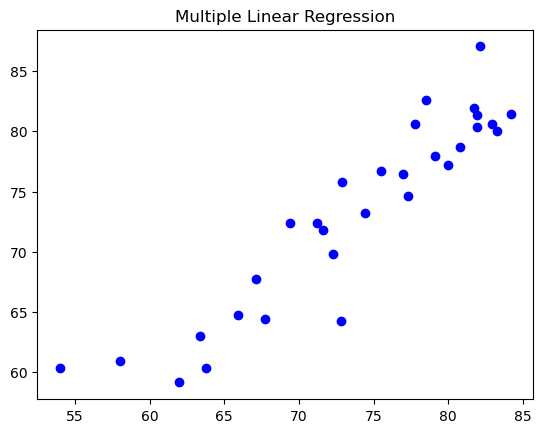

In [776]:
# Visualise the regression results
plt.title('Multiple Linear Regression')
plt.scatter(y_test, y_predicted, color='blue')
plt.show()

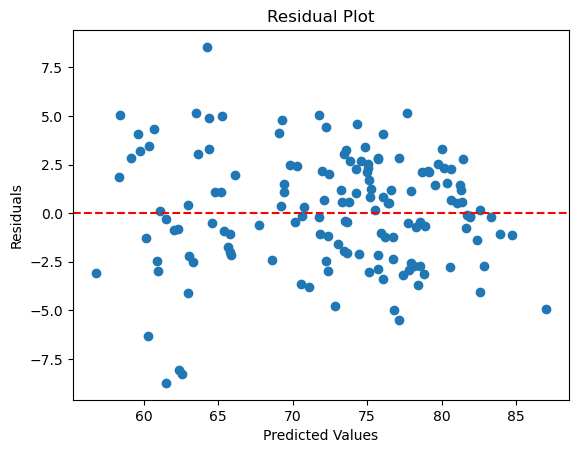

In [777]:
# Assuming 'model' is your fitted regression model
predictions = linreg.predict(X)  # X is your feature matrix
residuals = y - predictions  # y is your target variable

plt.scatter(predictions, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.title('Residual Plot')
plt.show()

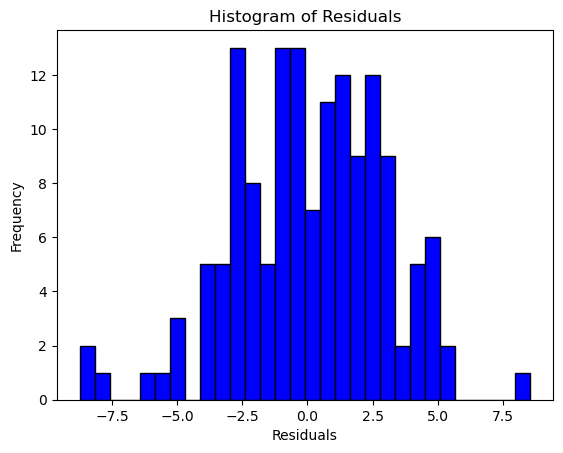

In [778]:
plt.hist(residuals, bins=30, color='blue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

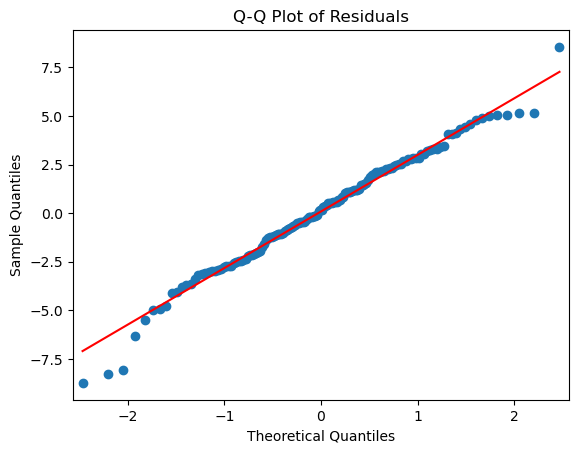

In [779]:
from statsmodels.graphics.gofplots import qqplot

qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

# multi with ALL features except 'GDP','Population','Urban_population', 'Status', 'Gross tertiary education enrollment (%)'

In [1195]:
# dropping unimportant features
multi_all_data = d1.copy()
multi_all_data.drop(['Country','Region','Unnamed: 0'],inplace=True,axis=1)
multi_all_data.drop(['GDP','Population','Urban_population', 'Status', 'Gross tertiary education enrollment (%)'],inplace=True,axis=1)

In [1196]:
multi_all_data

,health,income,inflation,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,Schooling,Birth Rate,Infant mortality,Life expectancy,Maternal mortality ratio,Physicians per thousand,Unemployment rate,fuel,GDP per capita
0,7.6,1610,9.4,0.0,65,42,23.3,67,65,0.0,3.6,32.5,47.9,64.5,638.0,0.3,11.1,35.4,502.1
1,6.5,9930,4.5,4.3,99,98,26.6,99,99,0.0,9.7,11.8,7.8,78.5,15.0,1.2,12.3,83.7,5352.9
2,4.2,12900,16.1,0.6,95,99,25.5,95,95,0.1,7.9,24.3,20.1,76.7,112.0,1.7,11.7,99.7,3948.3
3,2.9,5900,22.4,6.5,64,64,23.2,62,64,0.9,5.0,40.7,51.6,60.8,241.0,0.2,6.9,50.0,2973.6
4,6.0,19100,1.4,9.1,99,84,26.6,86,99,0.2,9.2,15.3,5.0,76.9,42.0,2.8,6.9,100.0,17790.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,5.8,4240,16.5,2.6,99,99,26.7,99,99,0.1,11.4,23.3,19.1,71.6,29.0,2.4,5.9,82.8,1724.8
142,5.2,2950,2.6,1.4,64,65,26.1,80,64,0.2,6.8,29.6,22.3,70.3,72.0,0.2,4.4,6.9,3058.1
143,4.9,16500,45.9,6.2,87,83,26.7,87,87,0.4,10.1,17.9,21.4,72.1,125.0,1.9,8.8,95.5,16915.5
144,6.8,4490,12.1,3.0,97,65,21.7,97,97,0.1,8.0,16.8,16.5,75.3,43.0,0.8,2.0,96.1,2715.3


In [1197]:
multi_all_data['Birth Rate'] = np.log1p(analyse['Birth Rate'])  # Logarithmic transformation
multi_all_data

,health,income,inflation,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,Schooling,Birth Rate,Infant mortality,Life expectancy,Maternal mortality ratio,Physicians per thousand,Unemployment rate,fuel,GDP per capita
0,7.6,1610,9.4,0.0,65,42,23.3,67,65,0.0,3.6,3.5,47.9,64.5,638.0,0.3,11.1,35.4,502.1
1,6.5,9930,4.5,4.3,99,98,26.6,99,99,0.0,9.7,2.5,7.8,78.5,15.0,1.2,12.3,83.7,5352.9
2,4.2,12900,16.1,0.6,95,99,25.5,95,95,0.1,7.9,3.2,20.1,76.7,112.0,1.7,11.7,99.7,3948.3
3,2.9,5900,22.4,6.5,64,64,23.2,62,64,0.9,5.0,3.7,51.6,60.8,241.0,0.2,6.9,50.0,2973.6
4,6.0,19100,1.4,9.1,99,84,26.6,86,99,0.2,9.2,2.8,5.0,76.9,42.0,2.8,6.9,100.0,17790.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,5.8,4240,16.5,2.6,99,99,26.7,99,99,0.1,11.4,3.2,19.1,71.6,29.0,2.4,5.9,82.8,1724.8
142,5.2,2950,2.6,1.4,64,65,26.1,80,64,0.2,6.8,3.4,22.3,70.3,72.0,0.2,4.4,6.9,3058.1
143,4.9,16500,45.9,6.2,87,83,26.7,87,87,0.4,10.1,2.9,21.4,72.1,125.0,1.9,8.8,95.5,16915.5
144,6.8,4490,12.1,3.0,97,65,21.7,97,97,0.1,8.0,2.9,16.5,75.3,43.0,0.8,2.0,96.1,2715.3


In [1198]:
y2 = multi_all_data['Life expectancy']
y2

0     64.5
1     78.5
2     76.7
3     60.8
4     76.9
      ... 
141   71.6
142   70.3
143   72.1
144   75.3
145   63.5
Name: Life expectancy, Length: 146, dtype: float64

In [1199]:
multi_all_data

,health,income,inflation,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,Schooling,Birth Rate,Infant mortality,Life expectancy,Maternal mortality ratio,Physicians per thousand,Unemployment rate,fuel,GDP per capita
0,7.6,1610,9.4,0.0,65,42,23.3,67,65,0.0,3.6,3.5,47.9,64.5,638.0,0.3,11.1,35.4,502.1
1,6.5,9930,4.5,4.3,99,98,26.6,99,99,0.0,9.7,2.5,7.8,78.5,15.0,1.2,12.3,83.7,5352.9
2,4.2,12900,16.1,0.6,95,99,25.5,95,95,0.1,7.9,3.2,20.1,76.7,112.0,1.7,11.7,99.7,3948.3
3,2.9,5900,22.4,6.5,64,64,23.2,62,64,0.9,5.0,3.7,51.6,60.8,241.0,0.2,6.9,50.0,2973.6
4,6.0,19100,1.4,9.1,99,84,26.6,86,99,0.2,9.2,2.8,5.0,76.9,42.0,2.8,6.9,100.0,17790.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,5.8,4240,16.5,2.6,99,99,26.7,99,99,0.1,11.4,3.2,19.1,71.6,29.0,2.4,5.9,82.8,1724.8
142,5.2,2950,2.6,1.4,64,65,26.1,80,64,0.2,6.8,3.4,22.3,70.3,72.0,0.2,4.4,6.9,3058.1
143,4.9,16500,45.9,6.2,87,83,26.7,87,87,0.4,10.1,2.9,21.4,72.1,125.0,1.9,8.8,95.5,16915.5
144,6.8,4490,12.1,3.0,97,65,21.7,97,97,0.1,8.0,2.9,16.5,75.3,43.0,0.8,2.0,96.1,2715.3


In [1200]:
# create a Python list of feature names
feature_cols = ['health', 'income', 'inflation', 'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'Schooling', 'Birth Rate', 'Infant mortality', 'Maternal mortality ratio', 'Physicians per thousand', 'Unemployment rate', 'fuel', 'GDP per capita']


# use the list to select a subset of the original DataFrame
X2 = multi_all_data[feature_cols]

In [1201]:
X2

,health,income,inflation,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,Schooling,Birth Rate,Infant mortality,Maternal mortality ratio,Physicians per thousand,Unemployment rate,fuel,GDP per capita
0,7.6,1610,9.4,0.0,65,42,23.3,67,65,0.0,3.6,3.5,47.9,638.0,0.3,11.1,35.4,502.1
1,6.5,9930,4.5,4.3,99,98,26.6,99,99,0.0,9.7,2.5,7.8,15.0,1.2,12.3,83.7,5352.9
2,4.2,12900,16.1,0.6,95,99,25.5,95,95,0.1,7.9,3.2,20.1,112.0,1.7,11.7,99.7,3948.3
3,2.9,5900,22.4,6.5,64,64,23.2,62,64,0.9,5.0,3.7,51.6,241.0,0.2,6.9,50.0,2973.6
4,6.0,19100,1.4,9.1,99,84,26.6,86,99,0.2,9.2,2.8,5.0,42.0,2.8,6.9,100.0,17790.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,5.8,4240,16.5,2.6,99,99,26.7,99,99,0.1,11.4,3.2,19.1,29.0,2.4,5.9,82.8,1724.8
142,5.2,2950,2.6,1.4,64,65,26.1,80,64,0.2,6.8,3.4,22.3,72.0,0.2,4.4,6.9,3058.1
143,4.9,16500,45.9,6.2,87,83,26.7,87,87,0.4,10.1,2.9,21.4,125.0,1.9,8.8,95.5,16915.5
144,6.8,4490,12.1,3.0,97,65,21.7,97,97,0.1,8.0,2.9,16.5,43.0,0.8,2.0,96.1,2715.3


In [1202]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size=0.8, random_state=42, shuffle=True)
print ("train size={}, test_size={}, total_size={}".format(X_train.shape[0], X_test.shape[0], d1.shape[0]))

train size=116, test_size=30, total_size=146


In [1203]:
linreg2 = LinearRegression()

In [1205]:
# fit the model to our training data
linreg2.fit(X_train, y_train)

LinearRegression()

In [1206]:
# the intercept and coefficients are stored in system variables
print('b0 =', linreg2.intercept_)
print('bi =', linreg2.coef_)

b0 = 85.85723343577885
bi = [ 2.53105393e-01 -2.52210456e-05 -2.84427724e-02 -1.92839612e-01
  2.84274002e-02  2.94386327e-02 -2.29505662e-01 -1.01150335e-01
  2.59558984e-02 -6.51148346e-01 -1.60207432e-01 -5.75421098e-01
 -2.64340688e-01 -2.80636360e-03 -2.18195936e-01  5.89961165e-02
  2.79779919e-02  1.16672639e-04]


In [1207]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg2.coef_))

[('health', 0.2531053933066246),
 ('income', -2.522104560950379e-05),
 ('inflation', -0.028442772368443434),
 ('Alcohol_consumption', -0.19283961225136972),
 ('Hepatitis_B', 0.028427400201833836),
 ('Measles', 0.02943863269528209),
 ('BMI', -0.22950566175076587),
 ('Polio', -0.10115033459724958),
 ('Diphtheria', 0.025955898438579535),
 ('Incidents_HIV', -0.6511483464798543),
 ('Schooling', -0.16020743241840762),
 ('Birth Rate', -0.5754210982406015),
 ('Infant mortality', -0.26434068781589093),
 ('Maternal mortality ratio', -0.0028063635995396402),
 ('Physicians per thousand', -0.21819593569026421),
 ('Unemployment rate', 0.05899611649500688),
 ('fuel', 0.02797799194275581),
 ('GDP per capita', 0.00011667263879685936)]

In [1208]:
# make predictions on the testing set
y_predicted = linreg2.predict(X_test)
y_predicted

array([81.75459851, 62.57431515, 80.4647552 , 79.47765764, 67.72064845,
       72.90267686, 56.27351298, 64.96507021, 81.40334676, 71.10057567,
       75.98246347, 77.4813954 , 71.87503266, 86.35137749, 78.84013247,
       77.83463723, 70.31218802, 84.52172991, 76.8069965 , 60.65799932,
       80.14441606, 80.40489507, 70.94950889, 75.23968914, 77.50775828,
       67.5659854 , 80.99044902, 61.9993936 , 69.21330697, 72.79599619])

In [1209]:
y_test

45    81.7
97    62.0
27    81.9
19    77.3
42    65.9
120   72.8
29    54.0
80    63.8
66    84.2
18    71.2
12    79.1
115   75.5
141   71.6
78    82.1
137   77.8
36    80.8
60    69.4
139   78.5
30    80.0
55    58.0
96    81.9
122   83.3
11    72.3
67    74.4
31    77.0
93    63.4
64    82.9
101   67.1
114   67.7
9     72.9
Name: Life expectancy, dtype: float64

In [1210]:
# calculate MAE using scikit-learn
print("MAE: ", metrics.mean_absolute_error(y_test, y_predicted))
# calculate MSE using scikit-learn
print("MSE: ", metrics.mean_squared_error(y_test, y_predicted))
# calculate RMSE using scikit-learn
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
print('R-squared (training) ', round(linreg2.score(X_train, y_train), 3))
print('R-squared (testing) ', round(linreg2.score(X_test, y_test), 3))
# R-squared
#r2_score(y, predict(X))
print("r2 score: ",r2_score(y_test, y_predicted))
print('Intercept: ', linreg2.intercept_)
print('Coefficient:', linreg2.coef_)
# Explained variance score: 1 is perfect prediction
eV = round(sm.explained_variance_score(y_test, y_predicted), 2)
print('Explained variance score ',eV )

MAE:  1.9685880401704876
MSE:  6.1470204609810954
RMSE:  2.4793185477023916
R-squared (training)  0.948
R-squared (testing)  0.902
r2 score:  0.9024953992905594
Intercept:  85.85723343577885
Coefficient: [ 2.53105393e-01 -2.52210456e-05 -2.84427724e-02 -1.92839612e-01
  2.84274002e-02  2.94386327e-02 -2.29505662e-01 -1.01150335e-01
  2.59558984e-02 -6.51148346e-01 -1.60207432e-01 -5.75421098e-01
 -2.64340688e-01 -2.80636360e-03 -2.18195936e-01  5.89961165e-02
  2.79779919e-02  1.16672639e-04]
Explained variance score  0.9


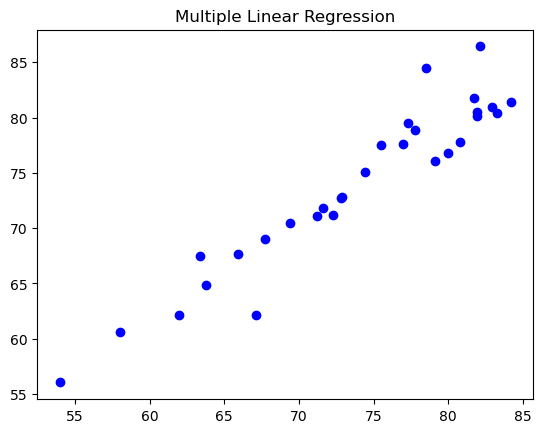

In [1189]:
# Visualise the regression results
plt.title('Multiple Linear Regression')
plt.scatter(y_test, y_predicted, color='blue')
plt.show()

# multi with 'Physicians per thousand', 'GDP per capita', 'fuel', 'income', 'Schooling','Polio'

In [375]:
# use the list to select a subset of the original DataFrame
X3 = d1[['Physicians per thousand', 'GDP per capita', 'fuel', 'income', 'Schooling','Polio']]

In [376]:
# select a Series from the DataFrame for y
y3 = d1['Life expectancy']

# print the first 5 values
y3.head()

0   64.5
1   78.5
2   76.7
3   60.8
4   76.9
Name: Life expectancy, dtype: float64

In [377]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, random_state=42, shuffle=True)

In [378]:
# default split 75:25
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(109, 6)
(109,)
(37, 6)
(37,)


In [379]:
# create a model
linreg3  = LinearRegression()

# fit the model to our training data
linreg3.fit(X_train, y_train)

LinearRegression()

In [380]:
# the intercept and coefficients are stored in system variables
print('b0 =', linreg3.intercept_)
print('bi =', linreg3.coef_)

b0 = 52.43212544329396
bi = [ 4.23267053e-01  1.30132297e-04  9.37449133e-02 -2.20900292e-05
  1.57179422e-01  1.10255519e-01]


In [381]:
# pair the feature names with the coefficients
list(zip(['Physicians per thousand', 'GDP per capita', 'fuel', 'income', 'Schooling','Polio'], linreg3.coef_))

[('Physicians per thousand', 0.42326705276812754),
 ('GDP per capita', 0.00013013229701216438),
 ('fuel', 0.09374491329444323),
 ('income', -2.2090029215946665e-05),
 ('Schooling', 0.15717942203602744),
 ('Polio', 0.11025551886501234)]

In [382]:
# make predictions on the testing set
y_predicted = linreg3.predict(X_test)
y_predicted

array([81.51949326, 62.2186121 , 80.2130698 , 67.39999398, 64.63392551,
       63.80490512, 59.34351544, 63.02392663, 80.15491719, 74.00828505,
       77.22518368, 74.19031595, 74.03528477, 88.19342834, 79.79562941,
       77.11540149, 70.08484785, 82.65947104, 76.61631949, 62.24802261,
       80.26768108, 78.79985509, 66.96567088, 75.66778939, 74.83852359,
       68.69888562, 78.86758838, 66.42817277, 65.18551719, 75.74996471,
       75.7960334 , 64.19223981, 68.85234872, 64.67493484, 61.50422247,
       76.90200885, 80.29739547])

In [383]:
y_test

45    81.7
97    62.0
27    81.9
19    77.3
42    65.9
120   72.8
29    54.0
80    63.8
66    84.2
18    71.2
12    79.1
115   75.5
141   71.6
78    82.1
137   77.8
36    80.8
60    69.4
139   78.5
30    80.0
55    58.0
96    81.9
122   83.3
11    72.3
67    74.4
31    77.0
93    63.4
64    82.9
101   67.1
114   67.7
9     72.9
4     76.9
26    58.9
123   76.8
128   65.0
16    61.5
10    77.2
138   81.3
Name: Life expectancy, dtype: float64

In [384]:
# calculate MAE using scikit-learn
print("MAE: ", metrics.mean_absolute_error(y_test, y_predicted))
# calculate MSE using scikit-learn
print("MSE: ", metrics.mean_squared_error(y_test, y_predicted))
# calculate RMSE using scikit-learn
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
print('R-squared (training) ', round(linreg3.score(X_train, y_train), 3))
print('R-squared (testing) ', round(linreg3.score(X_test, y_test), 3))
# R-squared
#r2_score(y, predict(X))
print("r2 score: ",r2_score(y_test, y_predicted))
print('Intercept: ', linreg3.intercept_)
print('Coefficient:', linreg3.coef_)
# Explained variance score: 1 is perfect prediction
eV = round(sm.explained_variance_score(y_test, y_predicted), 2)
print('Explained variance score ',eV )

MAE:  3.008838277257572
MSE:  15.147203428114363
RMSE:  3.8919408305001713
R-squared (training)  0.784
R-squared (testing)  0.768
r2 score:  0.7679490676557764
Intercept:  52.43212544329396
Coefficient: [ 4.23267053e-01  1.30132297e-04  9.37449133e-02 -2.20900292e-05
  1.57179422e-01  1.10255519e-01]
Explained variance score  0.78


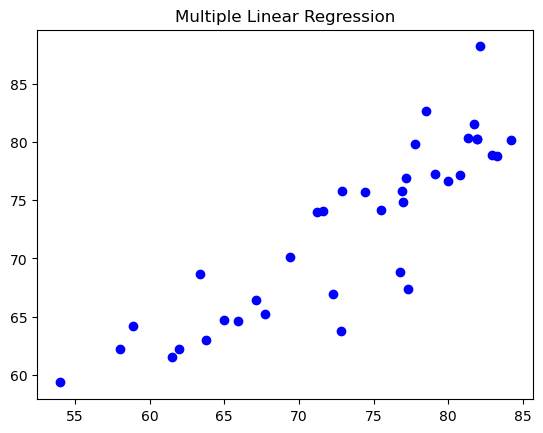

In [385]:
# Visualise the regression results
plt.title('Multiple Linear Regression')
plt.scatter(y_test, y_predicted, color='blue')

# simpe linear

In [386]:
X4 = d1['Infant mortality'].values.reshape(-1,1)
y4 = d1['Life expectancy'].values.reshape(-1,1)

<Axes: xlabel='Infant mortality', ylabel='Life expectancy'>

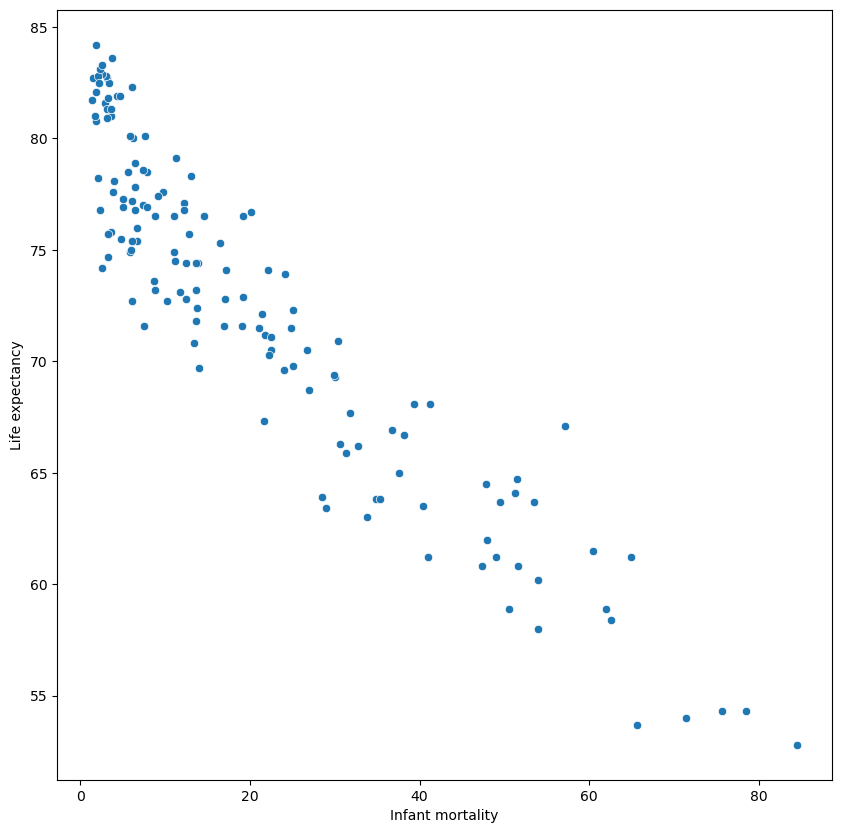

In [387]:
# plot all
plt.figure(figsize=(10,10))
sns.scatterplot(x='Infant mortality', y='Life expectancy', data=d1)

In [388]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X4, y4, random_state=42, train_size=0.8, shuffle=True) 

In [389]:
# creating an instance of Linear Regression model
myreg4 = LinearRegression()

In [390]:
# fit it to our data
myreg4.fit(X_train, y_train)

LinearRegression()

In [391]:
# get the calculated coefficients
a = myreg4.coef_
b = myreg4.intercept_

In [392]:
a

array([[-0.34880791]])

In [393]:
b

array([79.67880049])

In [394]:
y_predicted = myreg4.predict(X_test)
y_predicted

array([[79.19046942],
       [62.93602096],
       [78.17892649],
       [77.93476096],
       [68.761113  ],
       [73.71418528],
       [54.77391593],
       [67.36588137],
       [79.05094626],
       [72.07478812],
       [75.73727114],
       [78.00452254],
       [73.01656947],
       [79.01606547],
       [77.4115491 ],
       [79.01606547],
       [69.24944407],
       [77.72547621],
       [77.51619147],
       [60.84317351],
       [78.03940333],
       [78.80678072],
       [70.92372203],
       [74.83037058],
       [77.09762198],
       [69.56337119],
       [78.77189993],
       [59.72698821],
       [68.58670905],
       [72.98168868]])

In [395]:
test1 = myreg4.predict([[5]])
test1

array([[77.93476096]])

Text(0, 0.5, 'Life expectancy')

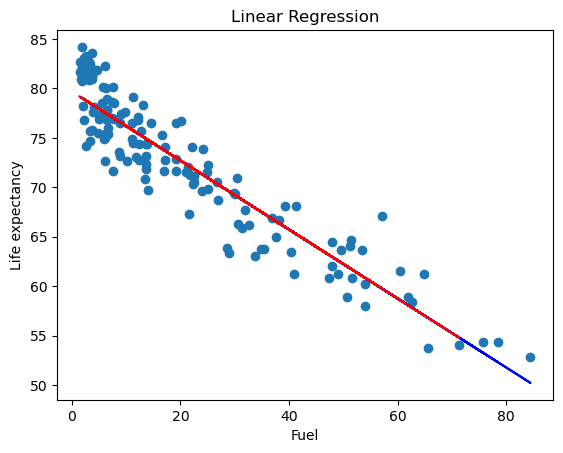

In [396]:
# Visualise the Linear Regression 
plt.title('Linear Regression')
plt.scatter(X4, y4)
plt.plot(X_train, (a*X_train) + b, color='blue')
plt.plot(X_test, y_predicted, color='red')
plt.xlabel('Fuel')
plt.ylabel('Life expectancy')

In [398]:
# calculate MAE using scikit-learn
print("MAE: ", metrics.mean_absolute_error(y_test, y_predicted))
# calculate MSE using scikit-learn
print("MSE: ", metrics.mean_squared_error(y_test, y_predicted))
# calculate RMSE using scikit-learn
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
print('R-squared (training) ', round(myreg4.score(X_train, y_train), 3))
print('R-squared (testing) ', round(myreg4.score(X_test, y_test), 3))
# R-squared
#r2_score(y, predict(X))
print("r2 score: ",r2_score(y_test, y_predicted))
print('Intercept: ', myreg4.intercept_)
print('Coefficient:', myreg4.coef_)
# Explained variance score: 1 is perfect prediction
eV = round(sm.explained_variance_score(y_test, y_predicted), 2)
print('Explained variance score ',eV )

MAE:  2.320783109909655
MSE:  8.856958858081102
RMSE:  2.97606432357923
R-squared (training)  0.871
R-squared (testing)  0.86
r2 score:  0.8595101086064537
Intercept:  [79.67880049]
Coefficient: [[-0.34880791]]
Explained variance score  0.87


# lasso 5

In [786]:
# dropping unimportant features
lasso_data = d1.copy()
lasso_data.drop(['Country','Region','Unnamed: 0'],inplace=True,axis=1)
lasso_data

,health,income,inflation,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,Schooling,Status,Birth Rate,GDP,Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Physicians per thousand,Population,Unemployment rate,Urban_population,fuel,GDP per capita
0,7.6,1610,9.4,0.0,65,42,23.3,67,65,0.0,3.6,0,32.5,19101353833.0,9.7,47.9,64.5,638.0,0.3,38041754.0,11.1,9797273.0,35.4,502.1
1,6.5,9930,4.5,4.3,99,98,26.6,99,99,0.0,9.7,0,11.8,15278077447.0,55.0,7.8,78.5,15.0,1.2,2854191.0,12.3,1747593.0,83.7,5352.9
2,4.2,12900,16.1,0.6,95,99,25.5,95,95,0.1,7.9,0,24.3,169988236398.0,51.4,20.1,76.7,112.0,1.7,43053054.0,11.7,31510100.0,99.7,3948.3
3,2.9,5900,22.4,6.5,64,64,23.2,62,64,0.9,5.0,0,40.7,94635415870.0,9.3,51.6,60.8,241.0,0.2,31825295.0,6.9,21061025.0,50.0,2973.6
4,6.0,19100,1.4,9.1,99,84,26.6,86,99,0.2,9.2,0,15.3,1727759259.0,24.8,5.0,76.9,42.0,2.8,97118.0,6.9,23800.0,100.0,17790.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,5.8,4240,16.5,2.6,99,99,26.7,99,99,0.1,11.4,0,23.3,57921286440.0,10.1,19.1,71.6,29.0,2.4,33580650.0,5.9,16935729.0,82.8,1724.8
142,5.2,2950,2.6,1.4,64,65,26.1,80,64,0.2,6.8,0,29.6,917058851.0,4.7,22.3,70.3,72.0,0.2,299882.0,4.4,76152.0,6.9,3058.1
143,4.9,16500,45.9,6.2,87,83,26.7,87,87,0.4,10.1,0,17.9,482359318768.0,79.3,21.4,72.1,125.0,1.9,28515829.0,8.8,25162368.0,95.5,16915.5
144,6.8,4490,12.1,3.0,97,65,21.7,97,97,0.1,8.0,0,16.8,261921244843.0,28.5,16.5,75.3,43.0,0.8,96462106.0,2.0,35332140.0,96.1,2715.3


In [787]:
# create a Python list of feature names
feature_cols = ['health', 'income', 'inflation', 'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'Schooling', 'Birth Rate', 'GDP', 'Infant mortality', 'Maternal mortality ratio', 'Physicians per thousand', 'Population', 'Unemployment rate', 'Urban_population',  'fuel', 'GDP per capita']

In [788]:
# use the list to select a subset of the original DataFrame
X5 = lasso_data[feature_cols]
X5

,health,income,inflation,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,Schooling,Birth Rate,GDP,Infant mortality,Maternal mortality ratio,Physicians per thousand,Population,Unemployment rate,Urban_population,fuel,GDP per capita
0,7.6,1610,9.4,0.0,65,42,23.3,67,65,0.0,3.6,32.5,19101353833.0,47.9,638.0,0.3,38041754.0,11.1,9797273.0,35.4,502.1
1,6.5,9930,4.5,4.3,99,98,26.6,99,99,0.0,9.7,11.8,15278077447.0,7.8,15.0,1.2,2854191.0,12.3,1747593.0,83.7,5352.9
2,4.2,12900,16.1,0.6,95,99,25.5,95,95,0.1,7.9,24.3,169988236398.0,20.1,112.0,1.7,43053054.0,11.7,31510100.0,99.7,3948.3
3,2.9,5900,22.4,6.5,64,64,23.2,62,64,0.9,5.0,40.7,94635415870.0,51.6,241.0,0.2,31825295.0,6.9,21061025.0,50.0,2973.6
4,6.0,19100,1.4,9.1,99,84,26.6,86,99,0.2,9.2,15.3,1727759259.0,5.0,42.0,2.8,97118.0,6.9,23800.0,100.0,17790.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,5.8,4240,16.5,2.6,99,99,26.7,99,99,0.1,11.4,23.3,57921286440.0,19.1,29.0,2.4,33580650.0,5.9,16935729.0,82.8,1724.8
142,5.2,2950,2.6,1.4,64,65,26.1,80,64,0.2,6.8,29.6,917058851.0,22.3,72.0,0.2,299882.0,4.4,76152.0,6.9,3058.1
143,4.9,16500,45.9,6.2,87,83,26.7,87,87,0.4,10.1,17.9,482359318768.0,21.4,125.0,1.9,28515829.0,8.8,25162368.0,95.5,16915.5
144,6.8,4490,12.1,3.0,97,65,21.7,97,97,0.1,8.0,16.8,261921244843.0,16.5,43.0,0.8,96462106.0,2.0,35332140.0,96.1,2715.3


In [789]:
y5 = lasso_data['Life expectancy']
y5

0     64.5
1     78.5
2     76.7
3     60.8
4     76.9
      ... 
141   71.6
142   70.3
143   72.1
144   75.3
145   63.5
Name: Life expectancy, Length: 146, dtype: float64

In [790]:
X_train, X_test, y_train, y_test = train_test_split(X5, y5, random_state=42, train_size=0.8)

In [791]:
# Scaling
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.transform(X_test)

In [792]:
lasso = Lasso(alpha = 1)

In [793]:
lasso.fit(X_train,y_train)

Lasso(alpha=1)

In [794]:
# the intercept and coefficients are stored in system variables
print('b0 =', lasso.intercept_)
print('bi =', lasso.coef_)

b0 = 75.64213117653301
bi = [ 0.00000000e+00 -4.49890534e-05 -2.24420186e-02 -1.24985188e-01
  0.00000000e+00  1.68898128e-02 -0.00000000e+00 -1.12751785e-02
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  3.69491801e-13 -2.65631015e-01 -5.31458169e-04 -0.00000000e+00
  4.07476041e-09 -0.00000000e+00 -5.36193411e-09  2.34576958e-02
  1.30071585e-04]


In [795]:
# pair the feature names with the coefficients
list(zip(feature_cols, lasso.coef_))

[('health', 0.0),
 ('income', -4.49890533826401e-05),
 ('inflation', -0.02244201861788924),
 ('Alcohol_consumption', -0.1249851875524479),
 ('Hepatitis_B', 0.0),
 ('Measles', 0.016889812823874046),
 ('BMI', -0.0),
 ('Polio', -0.011275178466547298),
 ('Diphtheria', 0.0),
 ('Incidents_HIV', -0.0),
 ('Schooling', -0.0),
 ('Birth Rate', -0.0),
 ('GDP', 3.694918009295692e-13),
 ('Infant mortality', -0.265631014538103),
 ('Maternal mortality ratio', -0.0005314581694913478),
 ('Physicians per thousand', -0.0),
 ('Population', 4.074760414667111e-09),
 ('Unemployment rate', -0.0),
 ('Urban_population', -5.361934114230845e-09),
 ('fuel', 0.02345769584384516),
 ('GDP per capita', 0.00013007158454920558)]

In [796]:
# make predictions on the testing set
y_predicted = lasso.predict(X_test)
y_predicted

array([81.64043171, 62.87922067, 81.10524918, 75.65868588, 67.36757506,
       71.31276335, 56.58133769, 65.74840245, 82.33278995, 71.77276456,
       75.83921463, 76.01876363, 72.4583331 , 86.54517345, 79.43516117,
       77.77924719, 72.96686319, 89.84173457, 76.72493664, 60.68632399,
       80.17828706, 79.41178985, 70.35010094, 74.69246602, 85.261676  ,
       68.85189724, 80.19476632, 61.97018845, 67.72929859, 72.82505735])

In [797]:
y_test

45    81.7
97    62.0
27    81.9
19    77.3
42    65.9
120   72.8
29    54.0
80    63.8
66    84.2
18    71.2
12    79.1
115   75.5
141   71.6
78    82.1
137   77.8
36    80.8
60    69.4
139   78.5
30    80.0
55    58.0
96    81.9
122   83.3
11    72.3
67    74.4
31    77.0
93    63.4
64    82.9
101   67.1
114   67.7
9     72.9
Name: Life expectancy, dtype: float64

In [798]:
# calculate MAE using scikit-learn
print("MAE: ", metrics.mean_absolute_error(y_test, y_predicted))
# calculate MSE using scikit-learn
print("MSE: ", metrics.mean_squared_error(y_test, y_predicted))
# calculate RMSE using scikit-learn
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
print('R-squared (training) ', round(lasso.score(X_train, y_train), 3))
print('R-squared (testing) ', round(lasso.score(X_test, y_test), 3))
# R-squared
#r2_score(y, predict(X))
print("r2 score: ",r2_score(y_test, y_predicted))
print('Intercept: ', lasso.intercept_)
print('Coefficient:', lasso.coef_)
# Explained variance score: 1 is perfect prediction
eV = round(sm.explained_variance_score(y_test, y_predicted), 2)
print('Explained variance score ',eV )

MAE:  2.580449429235496
MSE:  12.627562312135199
RMSE:  3.55352814990049
R-squared (training)  0.928
R-squared (testing)  0.8
r2 score:  0.7997004517889941
Intercept:  75.64213117653301
Coefficient: [ 0.00000000e+00 -4.49890534e-05 -2.24420186e-02 -1.24985188e-01
  0.00000000e+00  1.68898128e-02 -0.00000000e+00 -1.12751785e-02
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  3.69491801e-13 -2.65631015e-01 -5.31458169e-04 -0.00000000e+00
  4.07476041e-09 -0.00000000e+00 -5.36193411e-09  2.34576958e-02
  1.30071585e-04]
Explained variance score  0.8


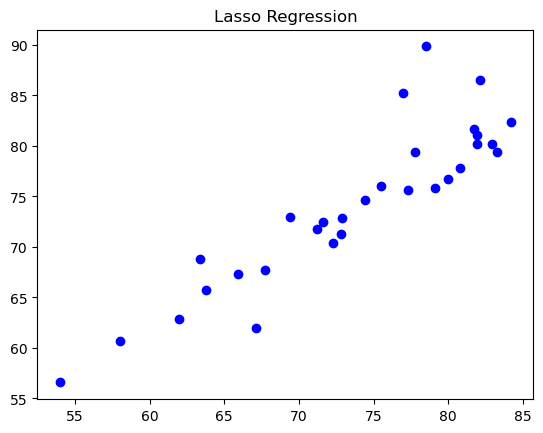

In [799]:
# Visualise the regression results
plt.title('Lasso Regression')
plt.scatter(y_test, y_predicted, color='blue')
plt.show()

In [800]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Assuming 'X' is your feature matrix and 'y' is your target variable
param_grid = {'alpha': [0.000000000000000000000001, 0.00001, 0.0001, 0.001, 0.003, 0.01, 0.1, 1, 10, 100,1000,100000]}  # Adjust the range based on your dataset

lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X5, y5)

print("Best alpha:", grid_search.best_params_['alpha'])

Best alpha: 1


In [801]:
# Assuming 'X' is your feature matrix and 'y' is your target variable
lasso_best_model = grid_search.best_estimator_

# Extract coefficients and feature names
feature_importance_lasso = pd.DataFrame({'Feature': X5.columns, 'Coefficient': lasso_best_model.coef_})

# Display feature importance based on Lasso coefficients
print("Feature Importance Based on Lasso Coefficients:")
print(feature_importance_lasso)

# Extract coefficients for linear regression
linreg.fit(X5, y5)
feature_importance_linear_reg = pd.DataFrame({'Feature': X5.columns, 'Coefficient': linreg.coef_})

# Display feature importance based on linear regression coefficients
print("\nFeature Importance Based on Linear Regression Coefficients:")
print(feature_importance_linear_reg)

Feature Importance Based on Lasso Coefficients:
                     Feature  Coefficient
0                     health          0.0
1                     income         -0.0
2                  inflation         -0.0
3        Alcohol_consumption         -0.1
4                Hepatitis_B         -0.0
5                    Measles          0.0
6                        BMI         -0.0
7                      Polio         -0.0
8                 Diphtheria          0.0
9              Incidents_HIV         -0.0
10                 Schooling         -0.0
11                Birth Rate         -0.1
12                       GDP         -0.0
13          Infant mortality         -0.2
14  Maternal mortality ratio         -0.0
15   Physicians per thousand         -0.0
16                Population         -0.0
17         Unemployment rate         -0.0
18          Urban_population          0.0
19                      fuel          0.0
20            GDP per capita          0.0

Feature Importance Based on

# POLY


In [653]:
# create a Python list of feature names
feature_cols = ['health', 'income', 'inflation', 'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'Schooling', 'Birth Rate', 'GDP', 'Infant mortality', 'Maternal mortality ratio', 'Physicians per thousand', 'Population', 'Unemployment rate', 'Urban_population',  'fuel', 'GDP per capita']

In [654]:
# use the list to select a subset of the original DataFrame
X6 = d1[feature_cols]
X6

,health,income,inflation,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,Schooling,Birth Rate,GDP,Infant mortality,Maternal mortality ratio,Physicians per thousand,Population,Unemployment rate,Urban_population,fuel,GDP per capita
0,7.6,1610,9.4,0.0,65,42,23.3,67,65,0.0,3.6,32.5,19101353833.0,47.9,638.0,0.3,38041754.0,11.1,9797273.0,35.4,502.1
1,6.5,9930,4.5,4.3,99,98,26.6,99,99,0.0,9.7,11.8,15278077447.0,7.8,15.0,1.2,2854191.0,12.3,1747593.0,83.7,5352.9
2,4.2,12900,16.1,0.6,95,99,25.5,95,95,0.1,7.9,24.3,169988236398.0,20.1,112.0,1.7,43053054.0,11.7,31510100.0,99.7,3948.3
3,2.9,5900,22.4,6.5,64,64,23.2,62,64,0.9,5.0,40.7,94635415870.0,51.6,241.0,0.2,31825295.0,6.9,21061025.0,50.0,2973.6
4,6.0,19100,1.4,9.1,99,84,26.6,86,99,0.2,9.2,15.3,1727759259.0,5.0,42.0,2.8,97118.0,6.9,23800.0,100.0,17790.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,5.8,4240,16.5,2.6,99,99,26.7,99,99,0.1,11.4,23.3,57921286440.0,19.1,29.0,2.4,33580650.0,5.9,16935729.0,82.8,1724.8
142,5.2,2950,2.6,1.4,64,65,26.1,80,64,0.2,6.8,29.6,917058851.0,22.3,72.0,0.2,299882.0,4.4,76152.0,6.9,3058.1
143,4.9,16500,45.9,6.2,87,83,26.7,87,87,0.4,10.1,17.9,482359318768.0,21.4,125.0,1.9,28515829.0,8.8,25162368.0,95.5,16915.5
144,6.8,4490,12.1,3.0,97,65,21.7,97,97,0.1,8.0,16.8,261921244843.0,16.5,43.0,0.8,96462106.0,2.0,35332140.0,96.1,2715.3


In [655]:
y6 = d1['Life expectancy']
y6

0     64.5
1     78.5
2     76.7
3     60.8
4     76.9
      ... 
141   71.6
142   70.3
143   72.1
144   75.3
145   63.5
Name: Life expectancy, Length: 146, dtype: float64

In [656]:
X_train, X_test, y_train, y_test = train_test_split(X6, y6, test_size=0.2, random_state=0)

In [657]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [658]:
polyfeat = PolynomialFeatures(degree =3)

In [659]:
xtrain_poly=polyfeat.fit_transform(X_train)
xtest_poly=polyfeat.fit_transform(X_test)

In [660]:
poly = linear_model.LinearRegression()
poly.fit(xtrain_poly,y_train)

LinearRegression()

In [661]:
y_prediction = poly.predict(xtest_poly)
y_prediction

array([82.516489  , 60.42308146, 80.68379343, 76.60426773, 76.42474278,
       84.11928408, 71.34950482, 72.15287263, 77.42085936, 66.55781318,
       75.57804456, 71.01233092, 62.76983964, 69.26087589, 75.24897738,
       57.43549747, 57.74610944, 48.92474519, 56.43729165, 84.50670954,
       75.46551882, 81.55183847, 65.12442382, 79.00086199, 75.23381253,
       61.40541425, 75.20552072, 72.80479146, 57.52028209, 79.29573642])

In [662]:
print('Poly model 1')
mean_squared_error = metrics.mean_squared_error(y_test, y_prediction)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, y_train), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, y_test), 3))

Poly model 1
Mean Squared Error (MSE)  4.79
R-squared (training)  1.0
R-squared (testing)  0.688


In [803]:
analyse = d1.copy()

In [804]:
analyse.shape

(146, 27)

In [805]:
analyse.drop(['Unnamed: 0', 'Country', 'Region'], axis=1, inplace=True)

In [806]:
analyse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   health                                   146 non-null    float64
 1   income                                   146 non-null    int64  
 2   inflation                                146 non-null    float64
 3   Alcohol_consumption                      146 non-null    float64
 4   Hepatitis_B                              146 non-null    int64  
 5   Measles                                  146 non-null    int64  
 6   BMI                                      146 non-null    float64
 7   Polio                                    146 non-null    int64  
 8   Diphtheria                               146 non-null    int64  
 9   Incidents_HIV                            146 non-null    float64
 10  Schooling                                146 non-n

In [807]:
analyse.describe()

,health,income,inflation,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,Schooling,Status,Birth Rate,GDP,Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Physicians per thousand,Population,Unemployment rate,Urban_population,fuel,GDP per capita
count,146.0,146.0,146.0,146.0,146.0,146.0,146.0,146.0,146.0,146.0,146.0,146.0,146.0,146.0,146.0,146.0,146.0,146.0,146.0,146.0,146.0,146.0,146.0,146.0
mean,6.9,17436.3,7.6,4.9,87.2,80.9,25.6,88.8,88.2,0.6,8.6,0.2,19.9,593733873000.1,40.6,20.5,72.7,149.5,1.9,46633267.8,6.7,26025837.3,70.0,14944.6
std,2.8,19325.7,10.8,3.8,14.1,16.5,2.2,12.5,14.7,1.3,3.1,0.4,9.9,2480509769391.0,29.9,19.6,7.5,225.7,1.6,165784174.7,5.0,85083372.3,37.0,19911.8
min,1.8,700.0,-4.2,0.0,22.0,21.0,20.7,37.0,16.0,0.0,1.4,0.0,7.3,194647202.0,0.8,1.4,52.8,2.0,0.0,97118.0,0.1,23800.0,0.2,261.2
25%,4.9,3767.5,1.8,1.4,84.5,64.0,23.8,85.0,87.0,0.1,6.1,0.0,10.9,13717814183.2,12.4,5.6,67.8,10.0,0.4,2950642.0,3.4,1778156.8,38.2,1965.0
50%,6.4,10700.0,5.3,4.2,92.0,86.5,26.1,93.0,94.0,0.1,9.1,0.0,17.8,53554600894.5,36.1,12.9,74.2,43.0,1.6,10062506.0,5.3,5532381.0,90.4,6326.2
75%,8.7,22600.0,9.7,8.0,97.0,94.0,26.9,97.0,97.0,0.4,11.3,0.0,28.2,297507980534.5,65.0,30.3,78.0,181.5,3.0,32291862.5,8.4,16870320.0,100.0,17693.2
max,17.9,125000.0,104.0,16.7,99.0,99.0,32.1,99.0,99.0,10.0,14.1,1.0,46.1,21427700000000.0,136.6,84.5,84.2,1140.0,7.1,1397715000.0,28.2,842933962.0,100.0,110172.4


In [808]:
from scipy.stats import skew

In [809]:
# Assuming 'data' is your feature or dataset
skewness = skew(analyse)
print(f"Skewness: {skewness}")

Skewness: [ 0.65574771  2.22726792  5.50335927  0.4427604  -1.92679497 -1.0293418
 -0.0262856  -1.94000763 -2.30236635  4.26230173 -0.3822453   1.26399726
  0.66022391  7.43371845  0.48056573  1.22664308 -0.64966183  2.20746307
  0.68309047  7.30327617  1.53240187  7.35567721 -0.83165066  2.03728071]


In [810]:
#import seaborn as sns

#sns.kdeplot(analyse, fill=True)
#plt.title('Density Plot of Your Feature')
#plt.show()

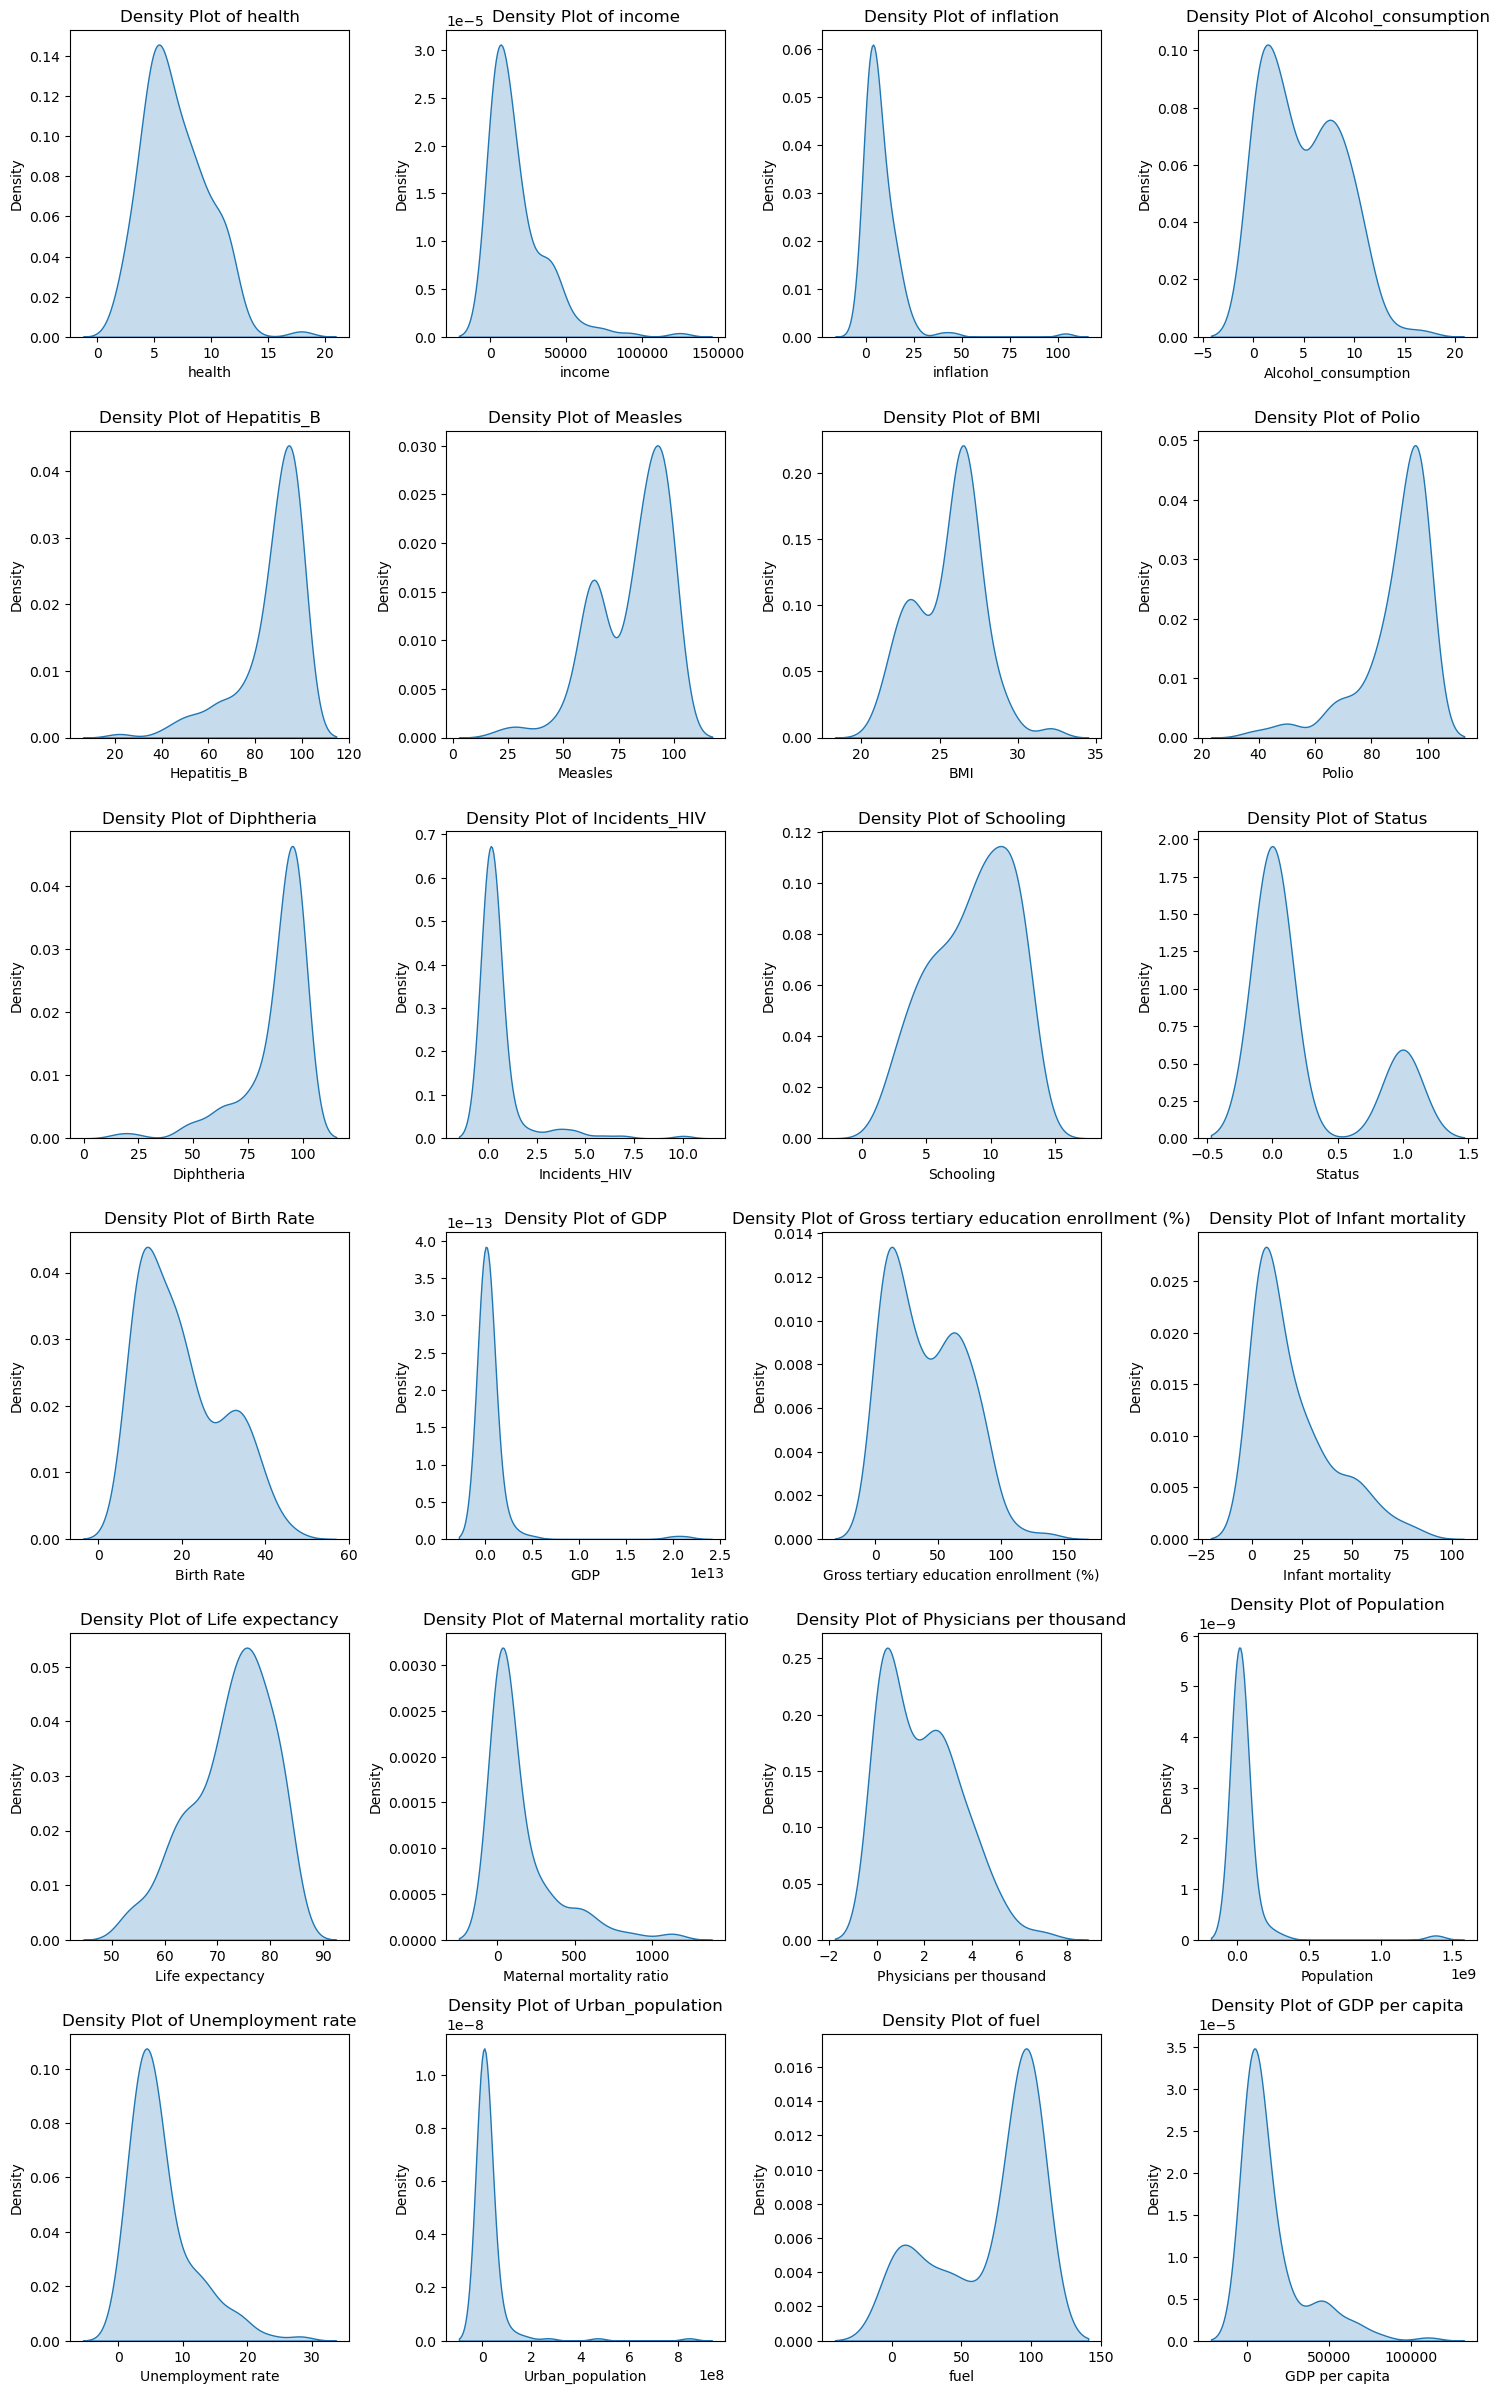

In [811]:
# Calculate the number of rows and columns for the subplot grid
num_cols = 4  # You can adjust this based on your preference
num_rows = (len(analyse) - 1) // num_cols + 1

plt.figure(figsize=(15, 4 * num_rows))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.kdeplot(analyse[column], fill=True)
    plt.title(f'Density Plot of {column}')

plt.tight_layout()
plt.show()

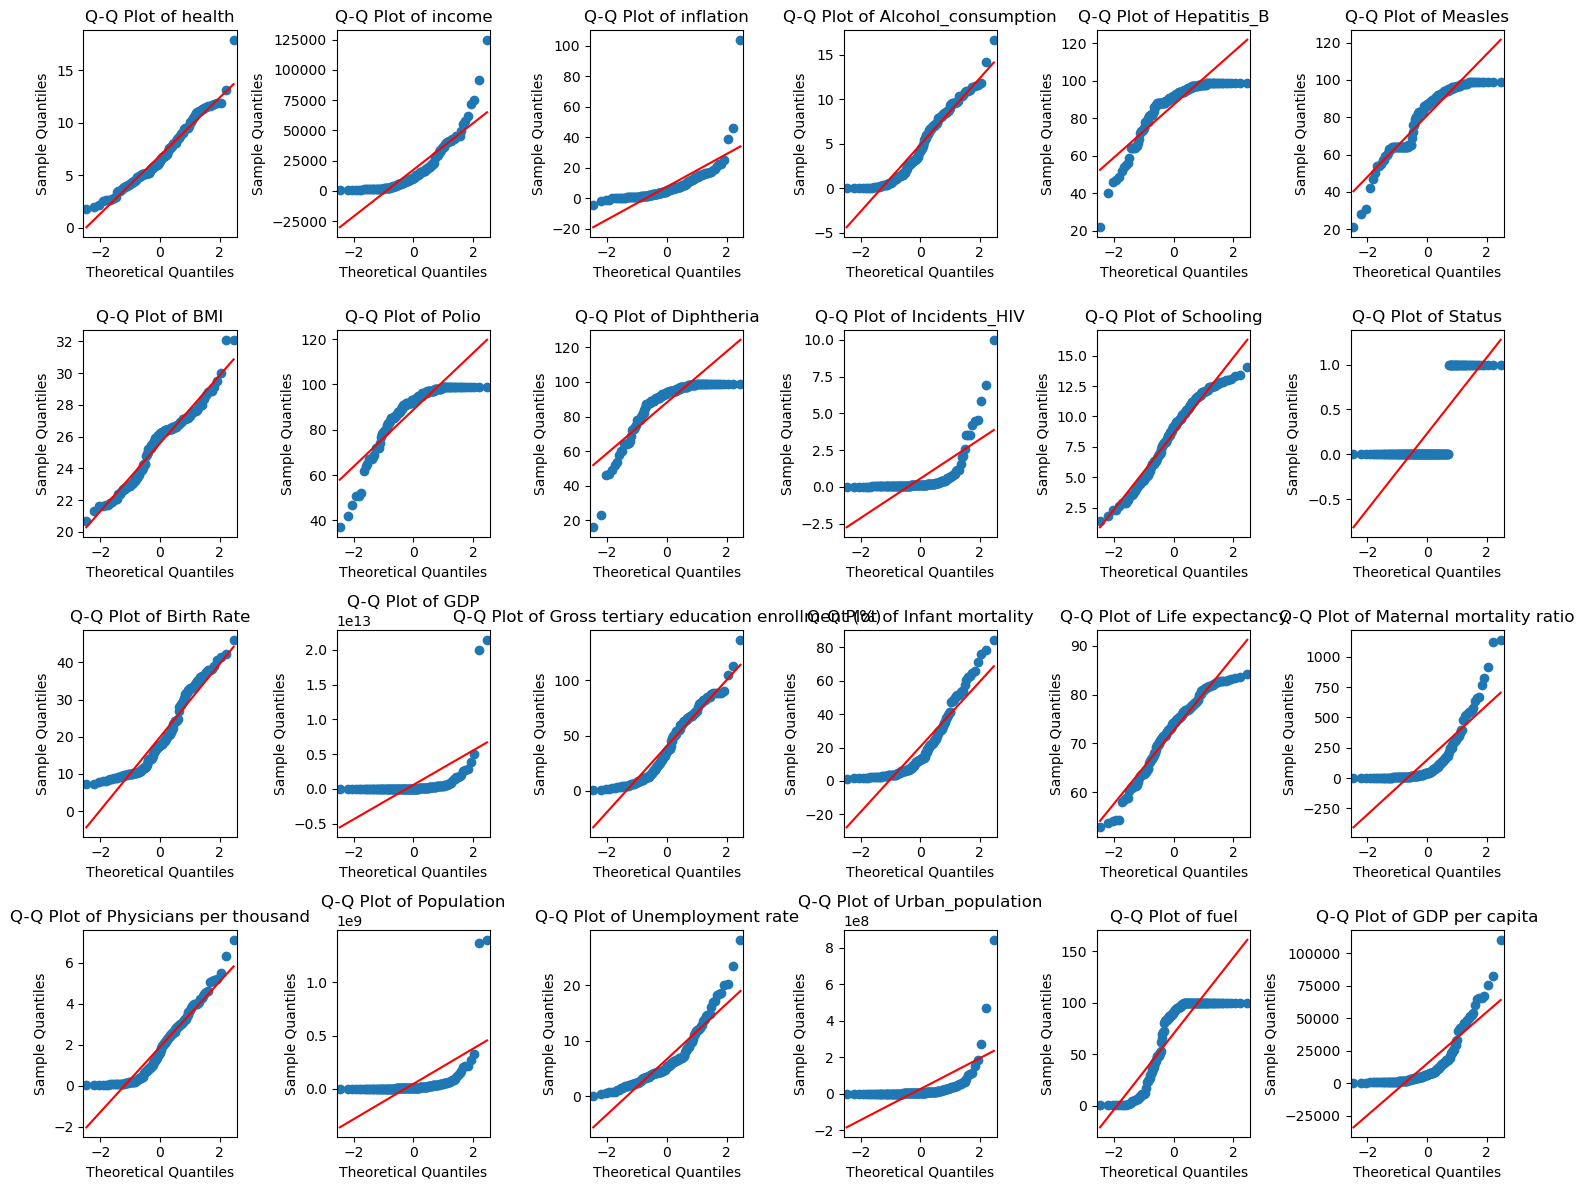

In [812]:
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 12))

for i, column in enumerate(analyse, 1):
    plt.subplot(4, 6, i)  # Adjust the subplot layout as needed
    qqplot(analyse[column], line='s', ax=plt.gca())
    plt.title(f'Q-Q Plot of {column}')

plt.tight_layout()
plt.show()

In [833]:
### Assuming 'analyse' is your DataFrame
Q1 = analyse.quantile(0.25)
Q3 = analyse.quantile(0.75)
IQR = Q3 - Q1

# Set a multiplier for considering a data point as an outlier
multiplier = 1.5

# Identify outliers for each feature
outliers = ((analyse < (Q1 - multiplier * IQR)) | (analyse > (Q3 + multiplier * IQR))).any(axis=1)

# Print the indices of rows containing outliers
print("Indices of rows containing outliers:")
print(analyse.index[outliers])

Indices of rows containing outliers:
Index([  0,   3,   5,   6,   7,   8,  11,  14,  19,  20,  21,  22,  24,  26,
        27,  28,  29,  31,  32,  35,  36,  37,  41,  42,  43,  45,  46,  47,
        48,  49,  50,  51,  54,  55,  57,  58,  59,  60,  61,  62,  63,  64,
        66,  69,  71,  72,  74,  75,  76,  77,  78,  79,  80,  83,  84,  85,
        88,  91,  93,  95,  96,  97,  98,  99, 101, 105, 106, 107, 108, 109,
       110, 112, 113, 116, 117, 118, 119, 121, 122, 123, 125, 126, 128, 131,
       132, 133, 135, 136, 137, 138, 139, 142, 143, 144, 145],
      dtype='int64')


In [819]:
# Assuming 'analyse' is your DataFrame
Q1 = analyse.quantile(0.25)
Q3 = analyse.quantile(0.75)
IQR = Q3 - Q1

# Set a multiplier for considering a data point as an outlier
multiplier = 1.5

# Identify outliers for each feature
outliers = ((analyse < (Q1 - multiplier * IQR)) | (analyse > (Q3 + multiplier * IQR)))

# Calculate the percentage of outliers for each feature
percentage_outliers = outliers.mean() * 100

# Display the percentage of outliers for each feature
print("Percentage of outliers for each feature:")
print(percentage_outliers)

Percentage of outliers for each feature:
health                                     0.7
income                                     4.8
inflation                                  4.1
Alcohol_consumption                        0.0
Hepatitis_B                               11.0
Measles                                    0.0
BMI                                        1.4
Polio                                      6.2
Diphtheria                                11.6
Incidents_HIV                             13.7
Schooling                                  0.0
Status                                    23.3
Birth Rate                                 0.0
GDP                                       11.6
Gross tertiary education enrollment (%)    0.0
Infant mortality                           2.7
Life expectancy                            0.0
Maternal mortality ratio                  11.6
Physicians per thousand                    0.7
Population                                 9.6
Unemployment rate  

Outlier Analysis Report
Dataset Overview:
Number of Rows: 146
Number of Columns: 27
Outlier Identification:
Method Used: IQR Method
Multiplier: 1.5
Handling of Outliers:
Decision: All identified outliers are considered valid and correct data points.

In [1161]:
d1.corr(numeric_only=True)['Life expectancy'].sort_values()

Infant mortality                          -0.9
Birth Rate                                -0.9
Maternal mortality ratio                  -0.8
Incidents_HIV                             -0.5
inflation                                 -0.3
Unemployment rate                         -0.0
Population                                 0.0
Unnamed: 0                                 0.0
Urban_population                           0.1
GDP                                        0.2
health                                     0.3
Hepatitis_B                                0.4
Alcohol_consumption                        0.4
BMI                                        0.5
Diphtheria                                 0.6
Measles                                    0.6
Status                                     0.6
Polio                                      0.6
income                                     0.6
GDP per capita                             0.7
Physicians per thousand                    0.7
Gross tertiar

## Strong Negative Correlations:
- Infant mortality: -0.9
- Birth Rate: -0.9
- Maternal mortality ratio: -0.8
- Incidents_HIV: -0.5
- Inflation: -0.3

## Weak/Negligible Correlations:
- Unemployment rate: -0.0
- Population: 0.0
- Unnamed: 0: 0.0 (This seems to be an index or identifier column)
- Urban population: 0.1
- GDP: 0.2

## Moderate Positive Correlations:
- Health: 0.3
- Hepatitis_B: 0.4
- Alcohol consumption: 0.4
- BMI: 0.5
- Diphtheria: 0.6
- Measles: 0.6
- Status: 0.6
- Polio: 0.6
- Income: 0.6

## Strong Positive Correlations:
- GDP per capita: 0.7
- Physicians per thousand: 0.7
- Gross tertiary education enrollment (%): 0.7

## Very Strong Positive Correlations:
- Schooling: 0.8
- Fuel: 0.8

In [1172]:
test2 = d1.copy()
test2.drop(['Unnamed: 0', 'Country', 'Region'], axis=1, inplace=True)
test2

,health,income,inflation,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,Schooling,Status,Birth Rate,GDP,Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Physicians per thousand,Population,Unemployment rate,Urban_population,fuel,GDP per capita
0,7.6,1610,9.4,0.0,65,42,23.3,67,65,0.0,3.6,0,32.5,19101353833.0,9.7,47.9,64.5,638.0,0.3,38041754.0,11.1,9797273.0,35.4,502.1
1,6.5,9930,4.5,4.3,99,98,26.6,99,99,0.0,9.7,0,11.8,15278077447.0,55.0,7.8,78.5,15.0,1.2,2854191.0,12.3,1747593.0,83.7,5352.9
2,4.2,12900,16.1,0.6,95,99,25.5,95,95,0.1,7.9,0,24.3,169988236398.0,51.4,20.1,76.7,112.0,1.7,43053054.0,11.7,31510100.0,99.7,3948.3
3,2.9,5900,22.4,6.5,64,64,23.2,62,64,0.9,5.0,0,40.7,94635415870.0,9.3,51.6,60.8,241.0,0.2,31825295.0,6.9,21061025.0,50.0,2973.6
4,6.0,19100,1.4,9.1,99,84,26.6,86,99,0.2,9.2,0,15.3,1727759259.0,24.8,5.0,76.9,42.0,2.8,97118.0,6.9,23800.0,100.0,17790.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,5.8,4240,16.5,2.6,99,99,26.7,99,99,0.1,11.4,0,23.3,57921286440.0,10.1,19.1,71.6,29.0,2.4,33580650.0,5.9,16935729.0,82.8,1724.8
142,5.2,2950,2.6,1.4,64,65,26.1,80,64,0.2,6.8,0,29.6,917058851.0,4.7,22.3,70.3,72.0,0.2,299882.0,4.4,76152.0,6.9,3058.1
143,4.9,16500,45.9,6.2,87,83,26.7,87,87,0.4,10.1,0,17.9,482359318768.0,79.3,21.4,72.1,125.0,1.9,28515829.0,8.8,25162368.0,95.5,16915.5
144,6.8,4490,12.1,3.0,97,65,21.7,97,97,0.1,8.0,0,16.8,261921244843.0,28.5,16.5,75.3,43.0,0.8,96462106.0,2.0,35332140.0,96.1,2715.3


In [1174]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

# Assuming 'analyse' is your DataFrame
X = analyse.drop(['Life expectancy', 'Birth Rate'], axis=1)
y = analyse['Life expectancy']

# Deal with outliers in 'Birth Rate' using a transformation
X['Transformed_Birth_Rate'] = np.log1p(analyse['Birth Rate'])  # Logarithmic transformation

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Simple Linear Regression
lr = LinearRegression()
lr.fit(X_train[['Transformed_Birth_Rate']], y_train)
y_pred_lr = lr.predict(X_test[['Transformed_Birth_Rate']])
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_lr
# Polynomial Regression
degree = 2  # You can adjust the degree based on your data
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_reg.fit(X_train[['Transformed_Birth_Rate']], y_train)
y_pred_poly = poly_reg.predict(X_test[['Transformed_Birth_Rate']])
mse_poly = mean_squared_error(y_test, y_pred_poly)
mse_poly
# Lasso Regression
lasso_reg = Lasso(alpha=1)  # You can adjust the alpha parameter
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(mse_lr)
print(mse_poly)
print(mse_lasso)

3.1936111553141135e-09
3.4365925604137076e-09
1.6014375287087402e-08
